# Step 0: import and reading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.style.use('ggplot')
from pylab import rcParams

In [3]:
import seaborn as sns
sns.set_style('whitegrid')
my_palette = sns.color_palette("Paired")

In [67]:
from scipy.stats import chi2_contingency, pearsonr

In [68]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer

In [6]:
pd.set_option('display.max_columns', 500)

In [98]:
df_base = pd.read_csv('./archive/Base_backup.csv')
df = df_base.copy()

In [8]:
import warnings as wr
wr.filterwarnings('ignore')

# Step 1: Data understanding

In [7]:
df_base.shape

(1000000, 32)

In [27]:
df_base.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,13096.035018,7850.955007,6742.080561,5,5,CB,163,1,BC,0,1,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,9223.283431,5745.251481,5941.664859,3,18,CA,154,1,BC,1,1,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,4471.472149,5471.988958,5992.555113,15,11,CA,89,1,BC,0,1,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,14431.993621,6755.344479,5970.336831,11,13,CA,90,1,BC,0,1,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,7601.511579,5124.046930,5940.734212,1,6,CA,91,0,BC,1,1,26,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [31]:
df_base.dtypes

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

In [7]:
df_base.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


In [63]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [64]:
df_base.nunique()

fraud_bool                               2
income                                   9
name_email_similarity               998861
prev_address_months_count              374
current_address_months_count           423
customer_age                             9
days_since_request                  989330
intended_balcon_amount              994971
payment_type                             5
zip_count_4w                          6306
velocity_6h                         998687
velocity_24h                        998940
velocity_4w                         998318
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
bank_months_count                       33
has_other_cards                          2
proposed_cr

In [112]:
df.describe(include=["object", "bool"]).transpose()

,count,unique,top,freq
payment_type,1000000,5,AB,370554
employment_status,1000000,7,CA,730252
housing_status,1000000,7,BC,372143
source,1000000,2,INTERNET,992952
device_os,1000000,5,other,342728


In [9]:
numerical_features = [x for x in df_base.columns if df_base[x].nunique() > 12]

print("Numerical Features: ")
print(numerical_features)

Numerical Features: 
['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'session_length_in_minutes']


In [10]:
# Create a list of categorical features
categorical_features = [x for x in df_base.columns if df_base[x].nunique() <= 12 and df_base[x].nunique()>= 2]
categorical_features.remove('fraud_bool')
print("Categorical Features:")
print(categorical_features)

Categorical Features:
['income', 'customer_age', 'payment_type', 'employment_status', 'email_is_free', 'housing_status', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source', 'device_os', 'keep_alive_session', 'device_distinct_emails_8w', 'month']


In [11]:
missing_value_val = [x for x in df_base.columns if (df_base[x].min() == -1)]

print("Features with missing values represented by -1:")
print(missing_value_val)

Features with missing values represented by -1:
['prev_address_months_count', 'current_address_months_count', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']


In [12]:
df_fraud_only = df[df['fraud_bool'] == 1]
df_non_fraud_only = df[df['fraud_bool'] == 0]

In [15]:
df_fraud_only.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
43,1,0.9,0.570800,-1,157,60,0.005908,35.337538,AA,4079,8139.265753,4312.230612,6341.431598,2,17,CA,131,1,BA,1,1,30,0,1500.0,0,INTERNET,4.036394,windows,1,1,0,0
140,1,0.1,0.993219,-1,67,20,0.015331,92.120139,AA,1192,8330.727428,6708.346918,6709.436651,37,6,CA,79,1,BB,0,1,25,0,1500.0,0,INTERNET,12.928072,windows,0,1,0,0
284,1,0.8,0.794351,-1,376,60,17.925951,41.422110,AA,815,9747.407396,6902.019628,6467.154127,46,3,CC,196,1,BA,1,0,28,0,1500.0,0,INTERNET,2.550167,linux,0,1,0,0
314,1,0.7,0.090000,-1,58,50,0.004134,-1.244047,AD,4011,8036.901841,5794.624929,6333.335164,2,6,CA,177,1,BA,0,1,27,0,1500.0,0,INTERNET,3.500856,windows,0,1,0,0
561,1,0.9,0.998248,31,45,30,0.010165,33.067538,AA,525,6883.814598,3655.042385,4327.215795,16,12,CA,273,1,BA,0,1,1,1,2000.0,0,INTERNET,44.536211,windows,0,1,0,0


In [13]:
df_base.isna().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [149]:
df_base.duplicated()
df_base.loc[df_base.duplicated()]

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month


# Step 2: Data preparation

In [10]:
fraud_vals = pd.DataFrame(df['fraud_bool'].value_counts())
print(fraud_vals)

             count
fraud_bool        
0           988971
1            11029


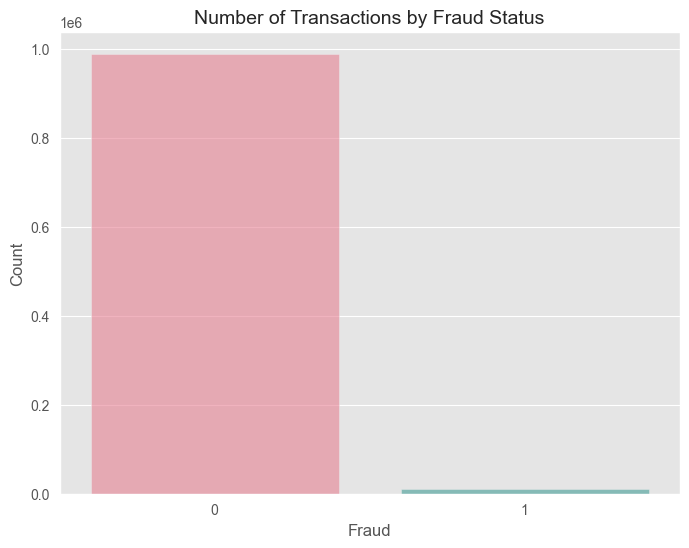

In [156]:
# Set up plot
plt.figure(figsize=(8, 6))

# Create bar plot
sns.barplot(data=fraud_vals, x="fraud_bool", y="count", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Fraud", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Number of Transactions by Fraud Status", fontsize=14)

# Display plot
plt.show()


### <font color='#2835ef'>Finding:  It's a highly imbalanced dataset, the target variable is split by 1/99, which may suggest that we need to normalise or transform the data for the next step.</font>

## 2.1 Cleaning Missing Value of Features

In [79]:
missing_vals = pd.DataFrame()

missing_features = ['prev_address_months_count', 'current_address_months_count', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']

for feature in missing_features:
    df.loc[df[feature] < 0, feature] = np.nan # df[feature] = df[feature].replace(-1, np.nan)
    missing_vals_col = df.groupby('fraud_bool')[feature].apply(lambda x: round(x.isna().sum()/len(x) * 100, 2))
    missing_vals[feature] = missing_vals_col

print(missing_vals)

            prev_address_months_count  current_address_months_count  \
fraud_bool                                                            
0                               71.06                          0.43   
1                               91.89                          0.13   

            bank_months_count  session_length_in_minutes  \
fraud_bool                                                 
0                       25.23                       0.20   
1                       37.54                       0.16   

            device_distinct_emails_8w  
fraud_bool                             
0                                0.04  
1                                0.04  


In [80]:
missing_vals = pd.DataFrame(missing_vals.T.stack())

missing_vals.reset_index(inplace=True)
missing_vals.rename(columns={'level_0': 'feature', 0: 'missing_vals'}, inplace=True)

print(missing_vals)

                        feature  fraud_bool  missing_vals
0     prev_address_months_count           0         71.06
1     prev_address_months_count           1         91.89
2  current_address_months_count           0          0.43
3  current_address_months_count           1          0.13
4             bank_months_count           0         25.23
5             bank_months_count           1         37.54
6     session_length_in_minutes           0          0.20
7     session_length_in_minutes           1          0.16
8     device_distinct_emails_8w           0          0.04
9     device_distinct_emails_8w           1          0.04


### <font color=#2835ef> Finding 2: Missing values are labeled as -1 in the dataset. Because it is labeled as a numerical number, it can skew some of the statistical results. When cleaning the data, we need to remove the influence of the missing value. Also there is a high level of missing values in two variables: prev_address_months_count and bank_months_count. <font/>

### <font color=#2835ef> Finding 3: For prev_address_months_count and bank_months_count, there is a higher percentage of missing value when it's a fraud than non-fraud. Can further explore the relationship between fraud type and missing values. Maybe fraudster are less likely to provide information on their previous address/bank <font/>

# Step 3: Feature Understanding

### Q: Is there any significant relationship between each numerical feature and the target feature?

### Visualise the distribution of each numerical feature in terms of the target value in KDE plot 

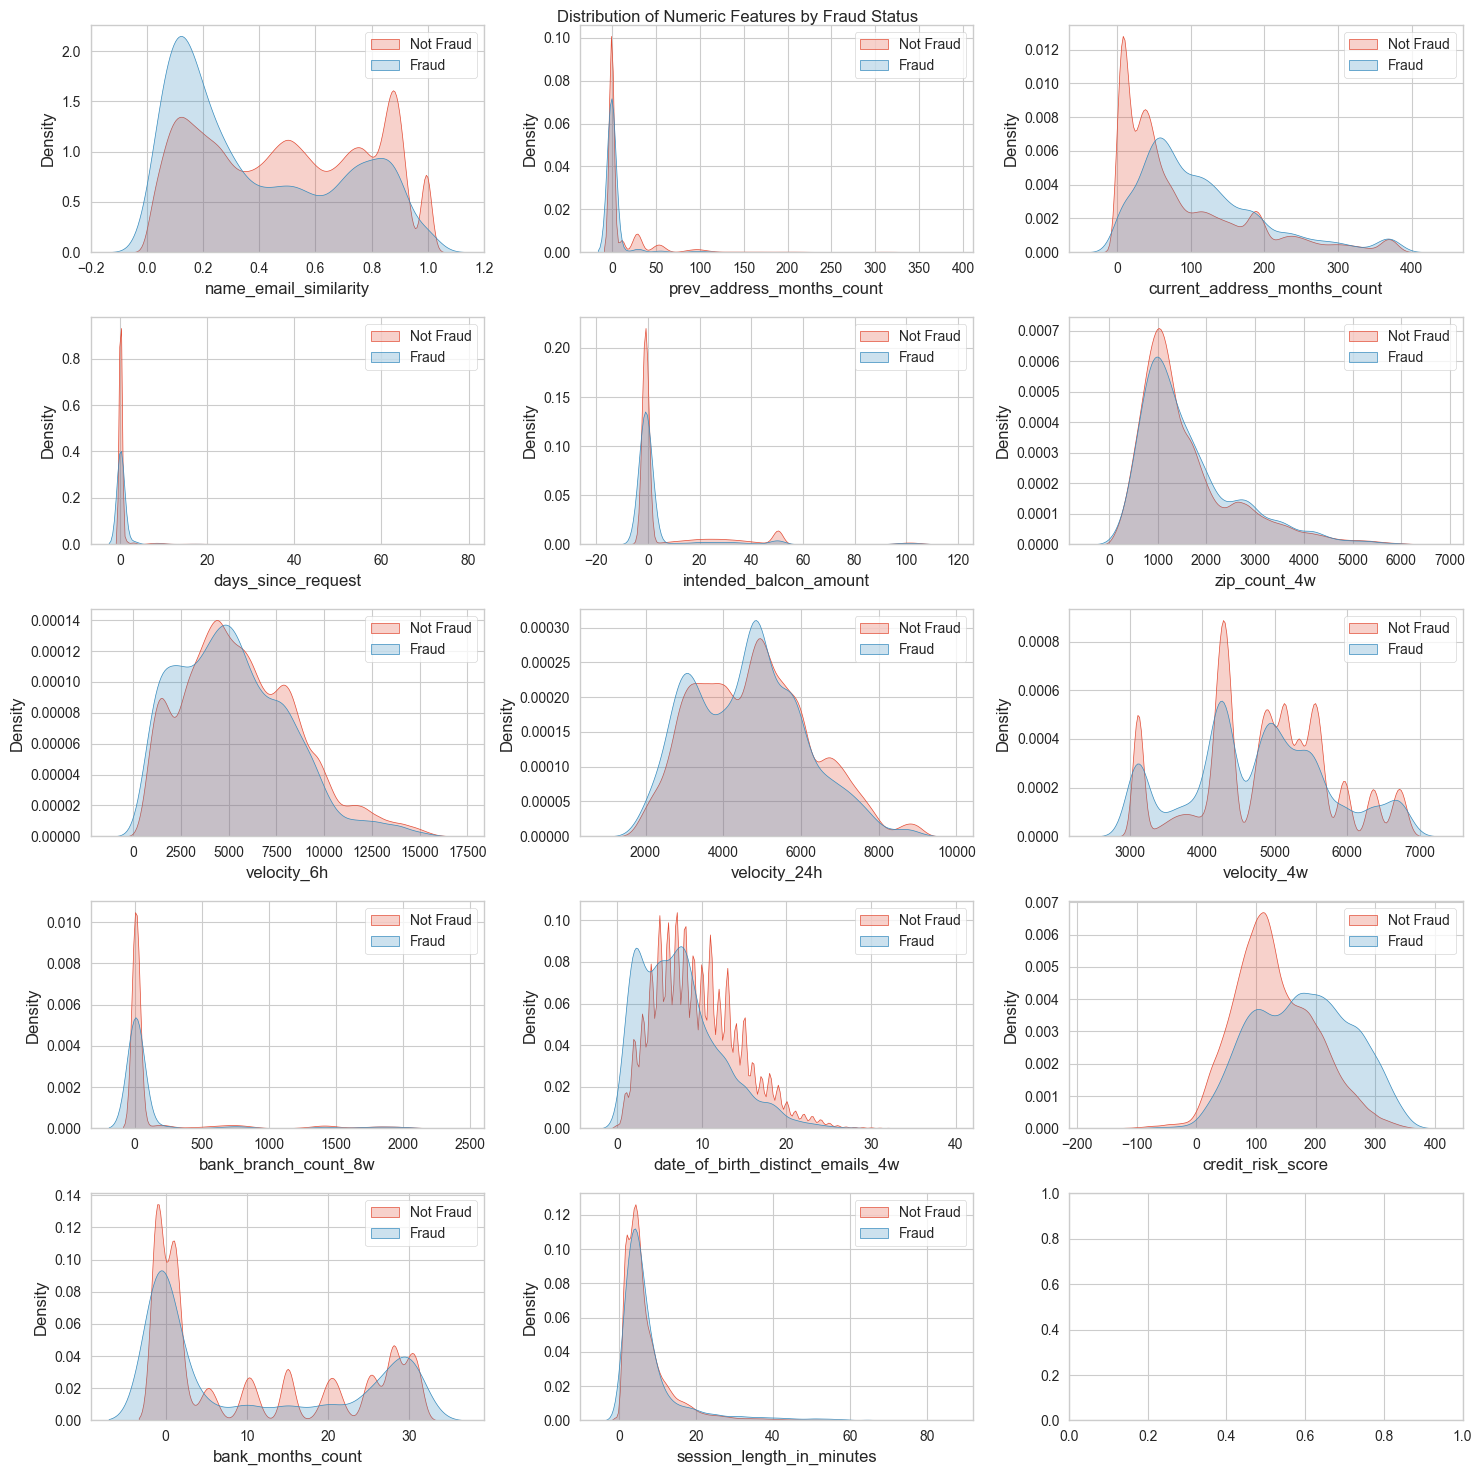

In [14]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Distribution of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(numerical_features):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=df[df['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud')
    sns.kdeplot(data=df[df['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud')
    ax.set_xlabel(feature)
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

### <font color=red> can use gini score here to find overlap <font/>

### Violin Plots - Find the median, quartiles, and potential outliers for each numeric feature, split by target value.

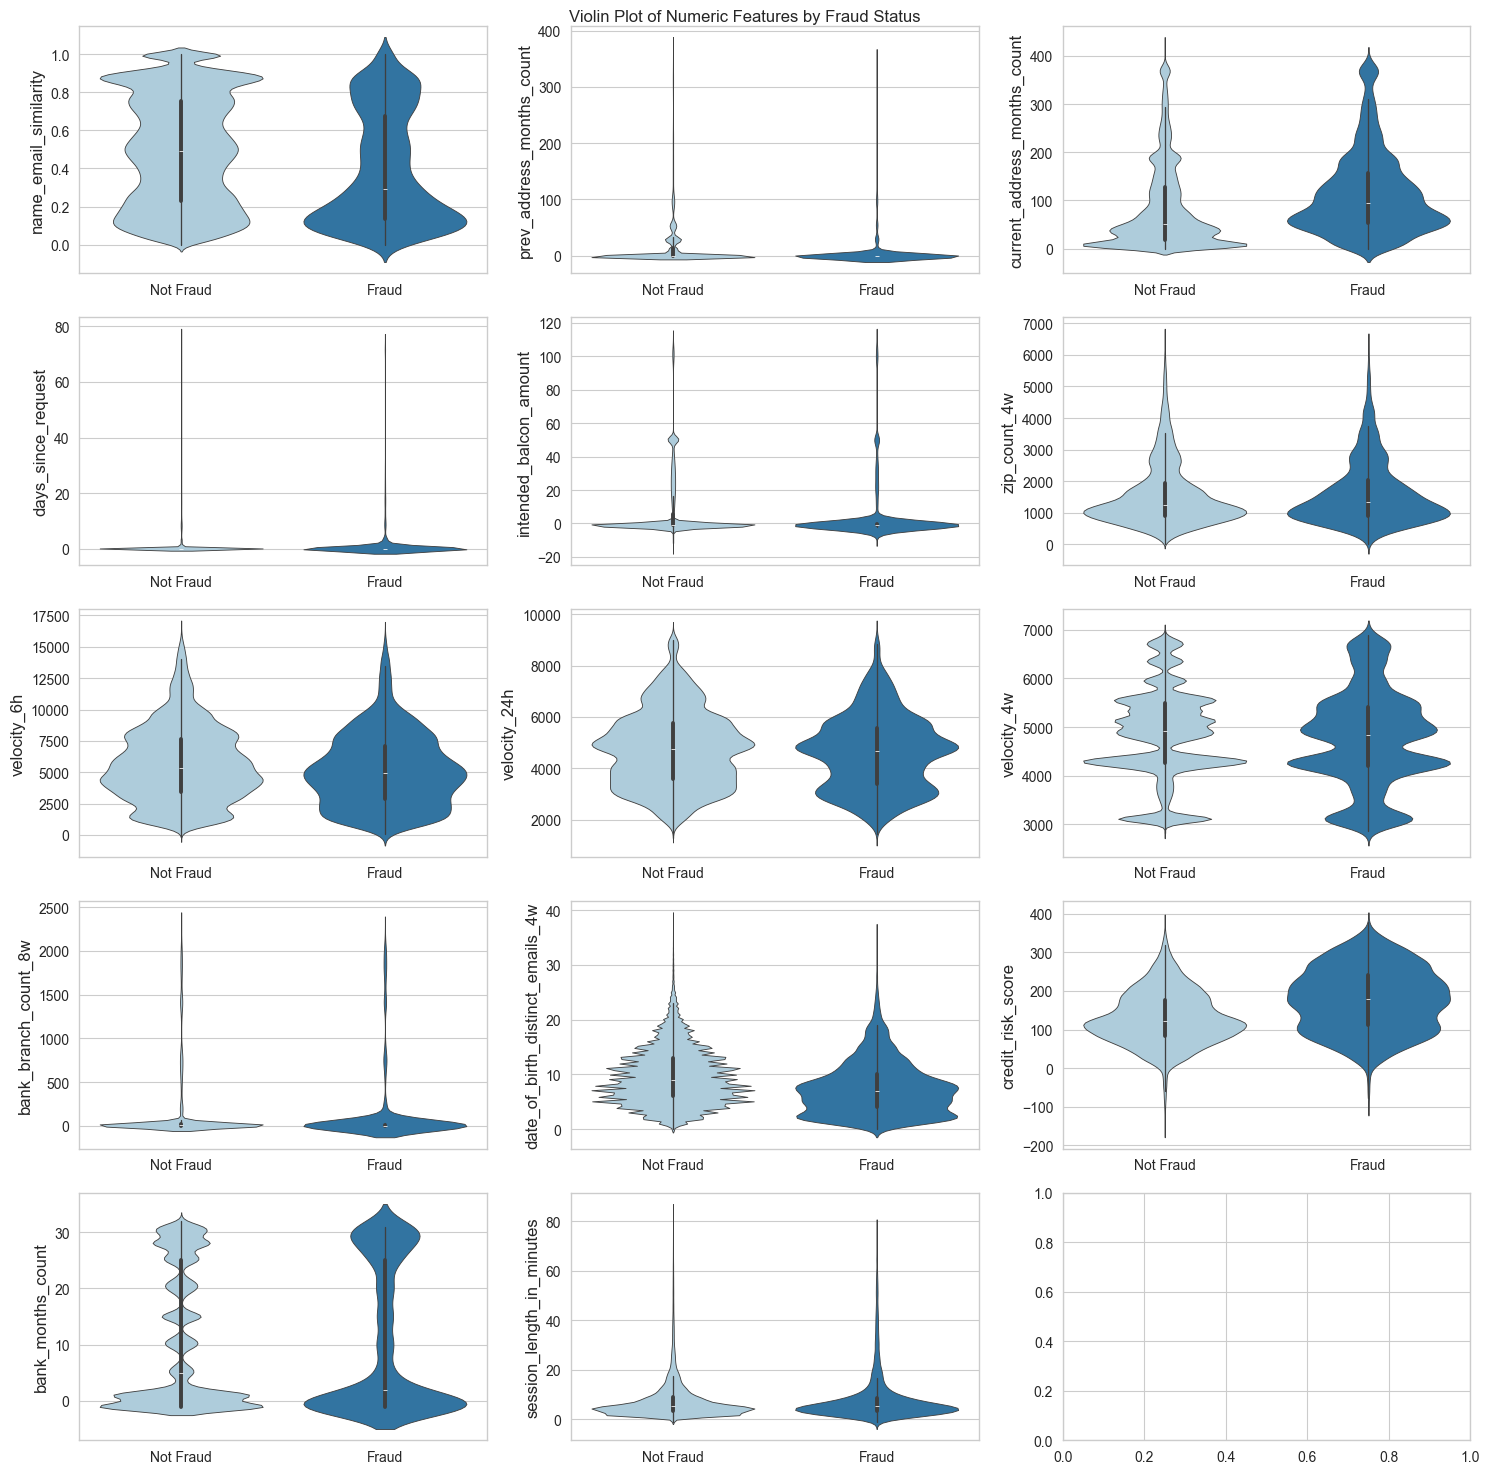

In [41]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
fig.suptitle('Violin Plot of Numeric Features by Fraud Status')

for i, feature in enumerate(numerical_features):
    ax = axes[i // 3][i % 3]
    sns.violinplot(data=df, x='fraud_bool', y=feature, ax=ax, palette='Paired')
    ax.set_xlabel('')
    ax.set_ylabel(feature)
    ax.set_xticklabels(['Not Fraud', 'Fraud'])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

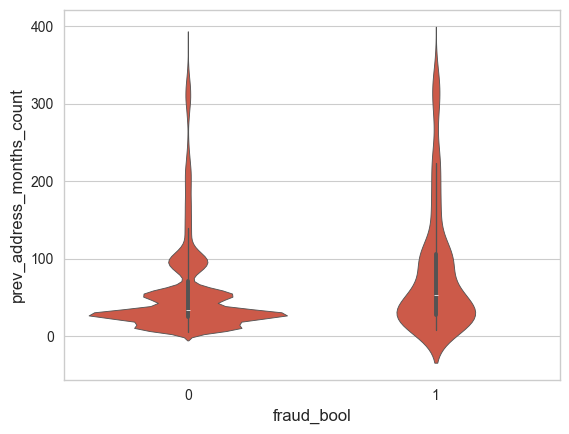

In [75]:
# fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
# fig.suptitle('Violin Plot of Numeric Features by Fraud Status')

# for i, feature in enumerate(numerical_features):
#     ax = axes[i // 3][i % 3]
#     sns.violinplot(data=df, x='fraud_bool', y=feature, ax=ax, palette='Paired')
#     ax.set_xlabel('')
#     ax.set_ylabel(feature)
#     ax.set_xticklabels(['Not Fraud', 'Fraud'])

# # Adjust the layout and display the plot
# plt.tight_layout()
# plt.show()

sns.violinplot(
    data=df[df['prev_address_months_count'] > 0],
    x='fraud_bool', 
    y='prev_address_months_count'
)
plt.show()

### <font color=#2835ef> Finding 4: The violin plot suggest there are outliers in some variables that we might need to remove or investigate further before modeling. Before removing the outliers, because this is a highly imbalanced dataset, we need to examine whether the outliers are rare cases of fraudsters that we need to take into account. <font/>

### <font color=#2835ef> Finding 5: The violin plot also suggest some features that worth further exploration: credit_risk_score, date_of_birth_distinct_emails_4w, current_address_months_count, name_email_similarity, prev_address_months_countdays. <font/>

## Visualise categorical features

In [30]:
print(len(categorical_features))

17


In [60]:
fraud_bool_group = df[categorical_features].groupby(df['fraud_bool'])
fraud_bool_group.describe()

income                                               \
               count      mean       std  min  25%  50%  75%  max   
fraud_bool                                                          
0           988971.0  0.561313  0.290309  0.1  0.3  0.6  0.8  0.9   
1            11029.0  0.686635  0.265579  0.1  0.6  0.8  0.9  0.9   

           customer_age                                                      \
                  count       mean        std   min   25%   50%   75%   max   
fraud_bool                                                                    
0              988971.0  33.609125  11.989302  10.0  20.0  30.0  40.0  90.0   
1               11029.0  40.858645  13.086334  10.0  30.0  40.0  50.0  90.0   

           email_is_free                                               \
                   count      mean       std  min  25%  50%  75%  max   
fraud_bool                                                              
0               988971.0  0.528423  0.499192  0.0  0.0  1.0  1.0  1.0   
1                11029.0  0.661075  0.473366  0.0  0.0  1.0  1.0  1.0   

           phone_home_valid                                               \
                      count      mean       std  min  25%  50%  75%  max   
fraud_bool                                                                 
0                  988971.0  0.418906  0.493380  0.0  0.0  0.0  1.0  1.0   
1                   11029.0  0.253060  0.434785  0.0  0.0  0.0  1.0  1.0   

           phone_mobile_valid                                               \
                        count      mean       std  min  25%  50%  75%  max   
fraud_bool                                                                   
0                    988971.0  0.890112  0.312750  0.0  1.0  1.0  1.0  1.0   
1                     11029.0  0.850576  0.356522  0.0  1.0  1.0  1.0  1.0   

           has_other_cards                                               \
                     count      mean       std  min  25%  50%  75%  max   
fraud_bool                                                                
0                 988971.0  0.224533  0.417275  0.0  0.0  0.0  0.0  1.0   
1                  11029.0  0.084414  0.278020  0.0  0.0  0.0  0.0  1.0   

           proposed_credit_limit                                               \
                           count        mean         std    min    25%    50%   
fraud_bool                                                                      
0                       988971.0  512.303162  484.365435  190.0  200.0  200.0   
1                        11029.0  833.986762  643.287556  190.0  200.0  500.0   

                           foreign_request                                     \
               75%     max           count      mean       std  min  25%  50%   
fraud_bool                                                                      
0            500.0  2100.0        988971.0  0.024962  0.156010  0.0  0.0  0.0   
1           1500.0  2100.0         11029.0  0.050322  0.218618  0.0  0.0  0.0   

                     keep_alive_session                                     \
            75%  max              count      mean       std  min  25%  50%   
fraud_bool                                                                   
0           0.0  1.0           988971.0  0.579571  0.493628  0.0  0.0  1.0   
1           0.0  1.0            11029.0  0.341645  0.474283  0.0  0.0  0.0   

                     device_distinct_emails_8w                                \
            75%  max                     count      mean       std  min  25%   
fraud_bool                                                                     
0           1.0  1.0                  988971.0  1.017630  0.178471 -1.0  1.0   
1           1.0  1.0                   11029.0  1.079427  0.320447 -1.0  1.0   

                              month                                          \
            50%  75%  max     count      mean       std  min  25%  50%  75%

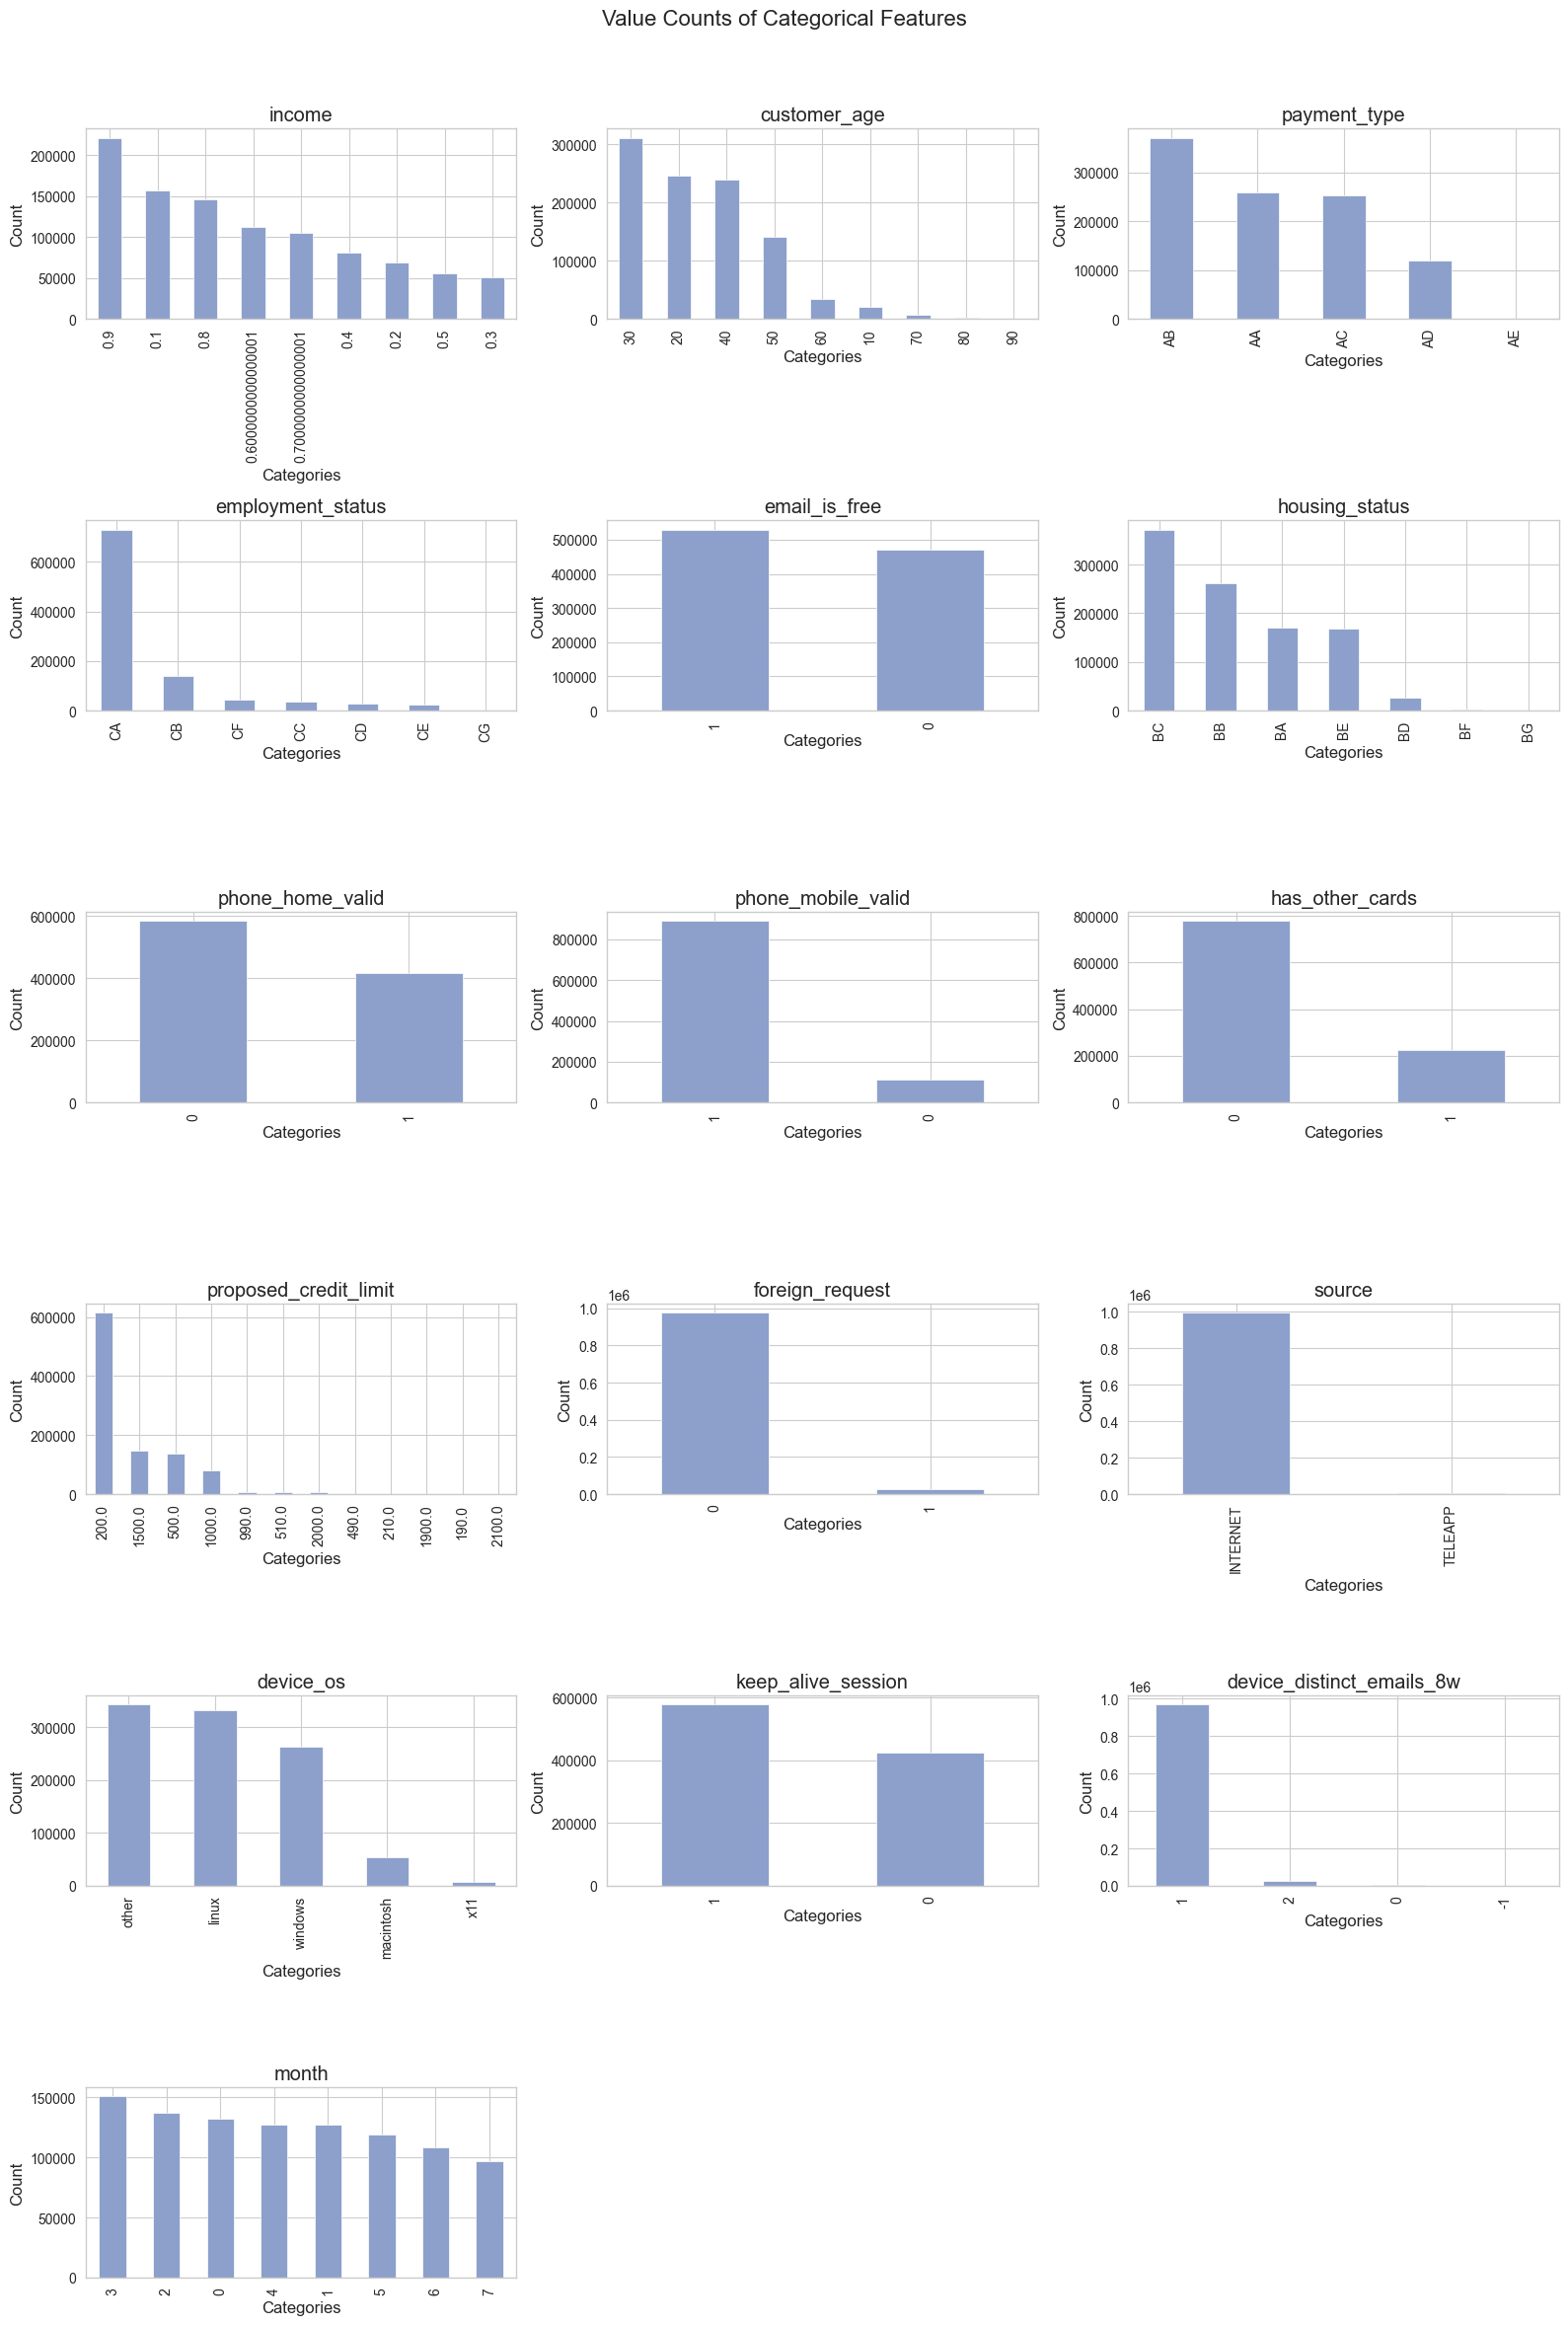

In [39]:
cols = 3
rows = 6

fig, axes = plt.subplots(rows, cols, figsize=(16, 24))
fig.suptitle("Value Counts of Categorical Features", fontsize=16)
axes = axes.flatten()

for idx, feature in enumerate(categorical_features):
    df_base[feature].value_counts().plot(kind='bar', ax=axes[idx], title=f"{feature}", color='#8da0cb' )
    axes[idx].set_xlabel("Categories")
    axes[idx].set_ylabel("Count")

for idx in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### <font color=blue>  Highly imbalanced variables are less useful, such as source, where very little portion of it is INTERNET. but because the dataset is imbalanced, so we still need to check the proportion of fraud for each class before removing the variable for analysis. For example, it could be the case that all the records with source=TELEAPP are fraudsters. <font/>

In [61]:
# fig, axes = plt.subplots(6, 3, figsize=(16, 24))
# fig.suptitle('Distribution of Categorical Features by fraud type', fontsize=16)
# axes = axes.flatten()

# for idx, feature in enumerate(categorical_features):
#     sns.countplot(x=feature, hue='fraud_bool', data=df, ax=axes[idx], palette='Paired')
#     axes[idx].set_title(f'{feature} by Fraud Type')
#     axes[idx].set_xlabel('')
#     axes[idx].set_ylabel('Count')
#     axes[idx].tick_params(axis='x')

# for idx in range(len(categorical_features), len(axes)):
#     fig.delaxes(axes[idx])

# plt.tight_layout(rect=[0, 0.03, 1, 0.97])
# plt.show()

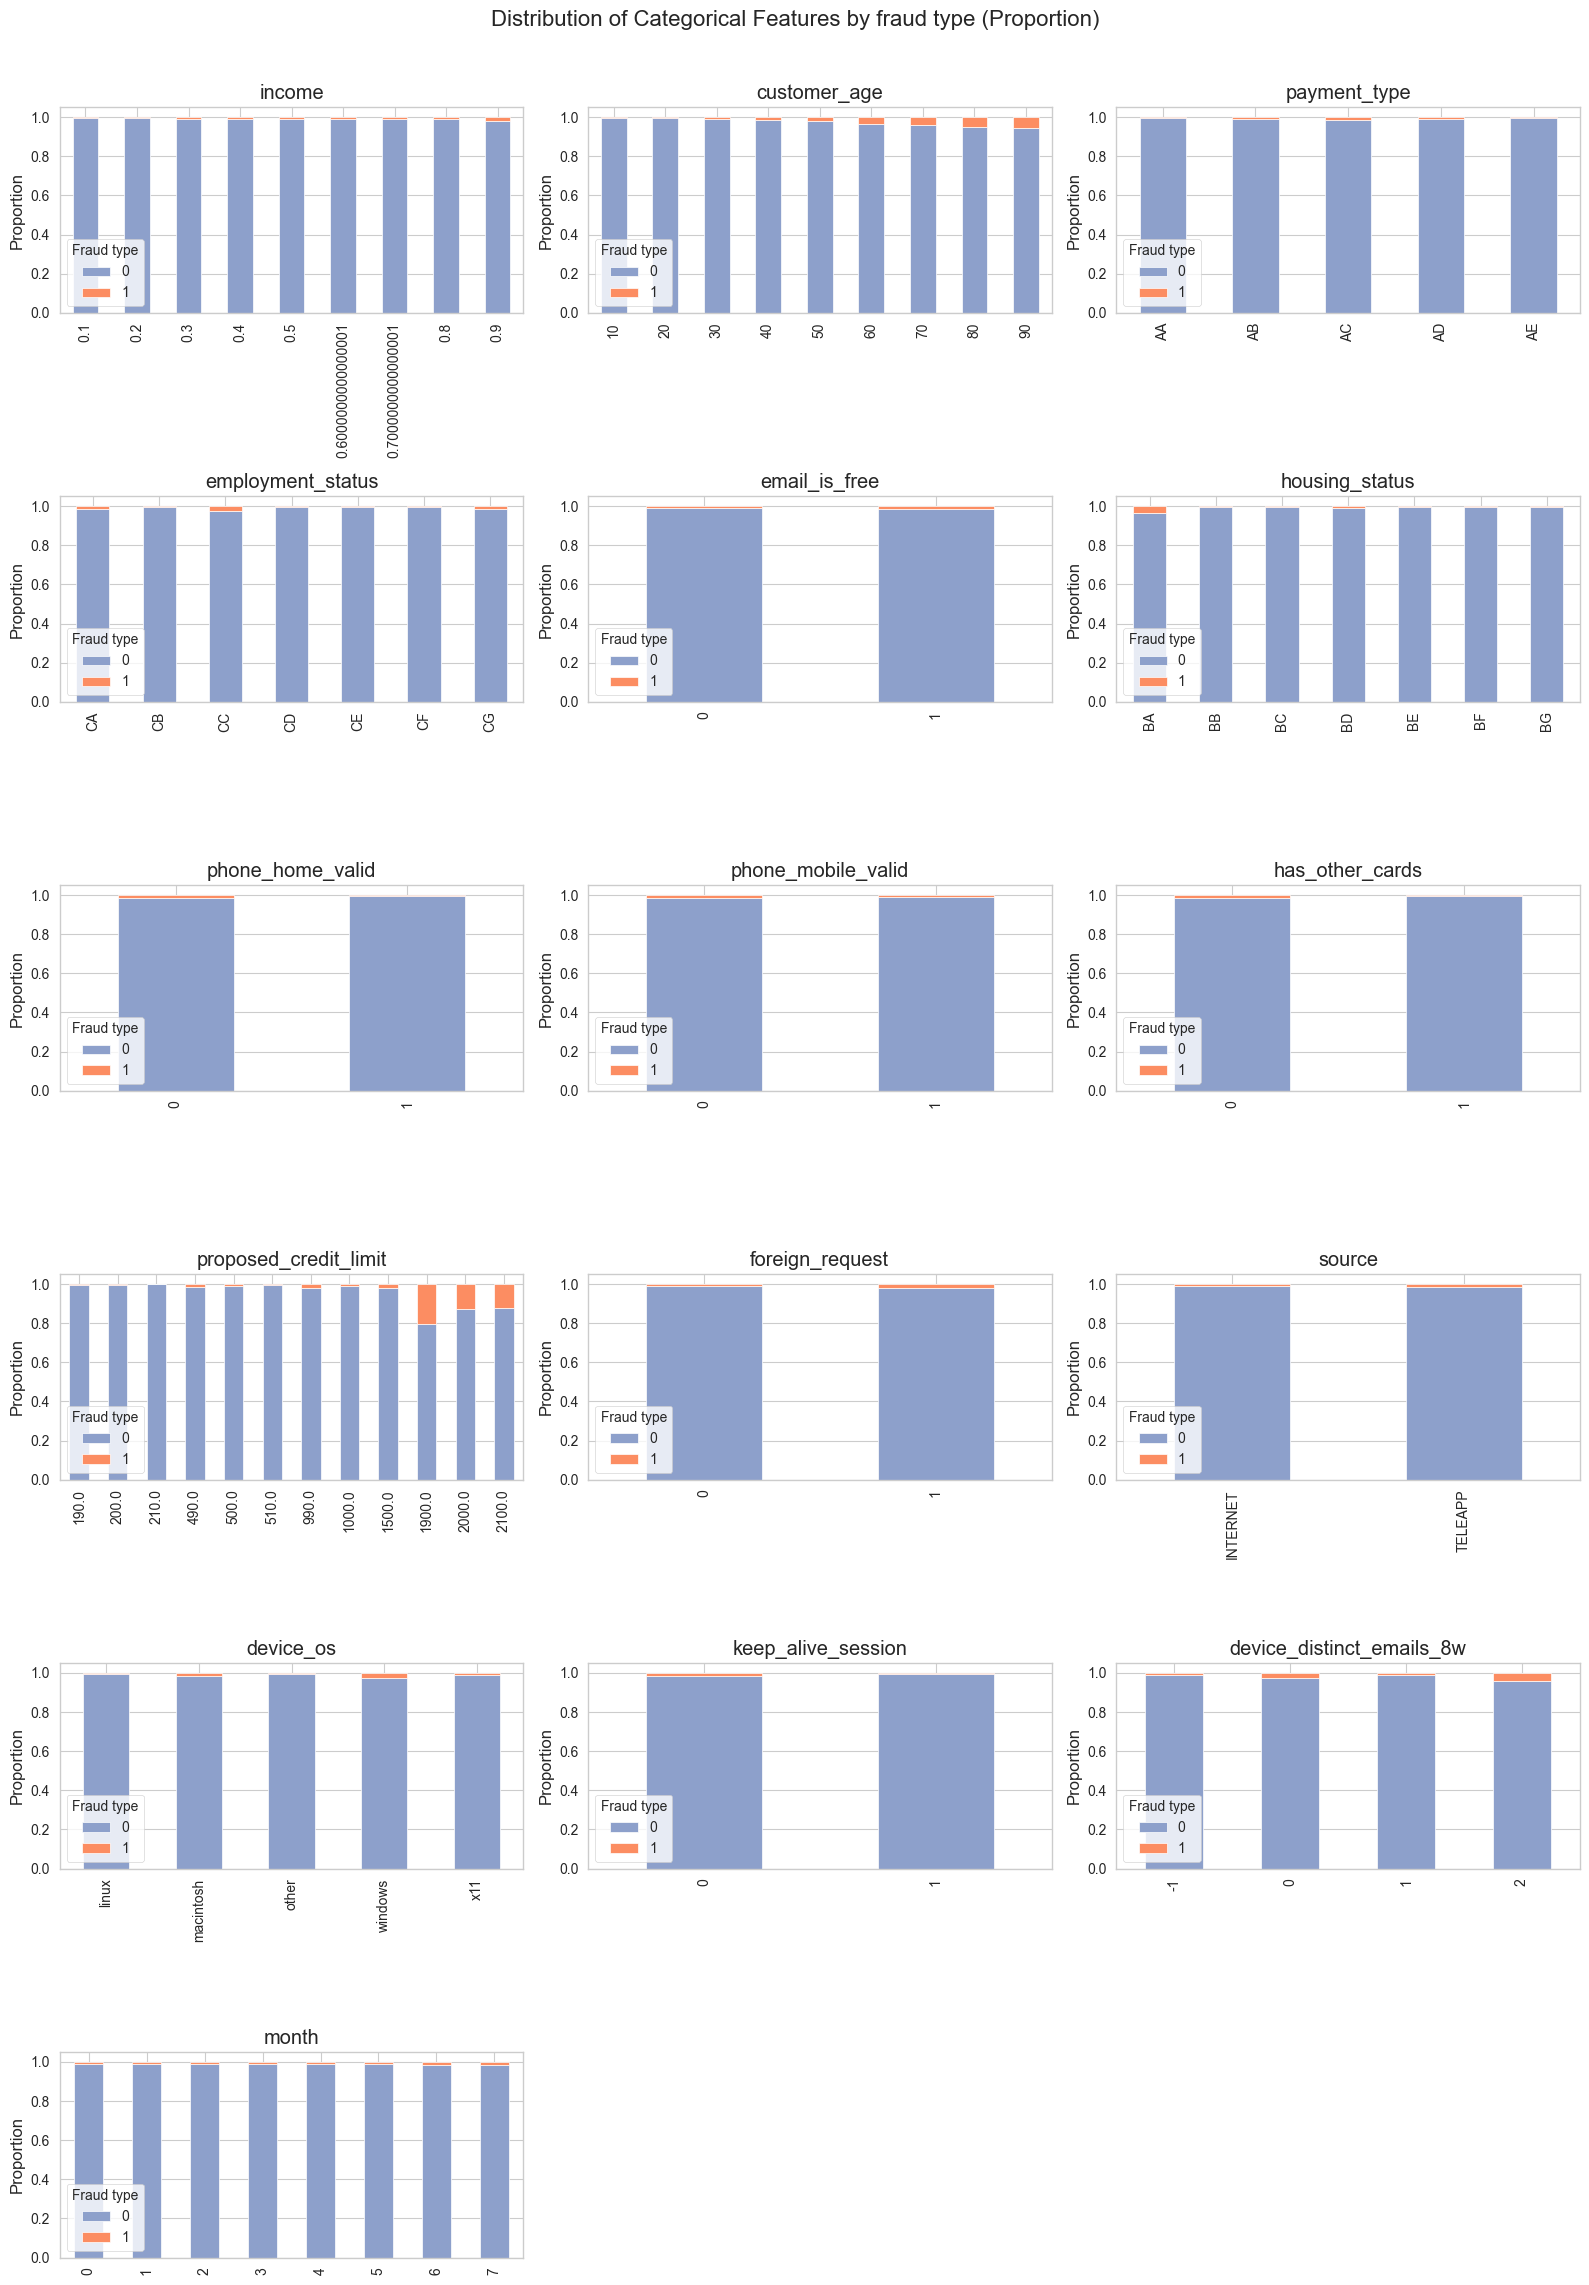

In [44]:
fig, axes = plt.subplots(6, 3, figsize=(16, 24))
axes = axes.flatten()
fig.suptitle('Distribution of Categorical Features by fraud type (Proportion)', fontsize=16)

for idx, feature in enumerate(categorical_features):
    # Calculate the proportion of fraud_bool within each category
    feature_counts = df[feature].value_counts(normalize=True).sort_index()
    plot_data = df.groupby(feature)['fraud_bool'].value_counts(normalize=True).unstack(fill_value=0)
    
    plot_data.plot(kind='bar', stacked=True, color=['#8da0cb', '#fc8d62'], ax=axes[idx])
    axes[idx].set_title(f'{feature}')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Proportion')
    axes[idx].tick_params(axis='x')
    axes[idx].legend(title='Fraud type', loc='lower left', bbox_to_anchor=(0, 0))

for idx in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

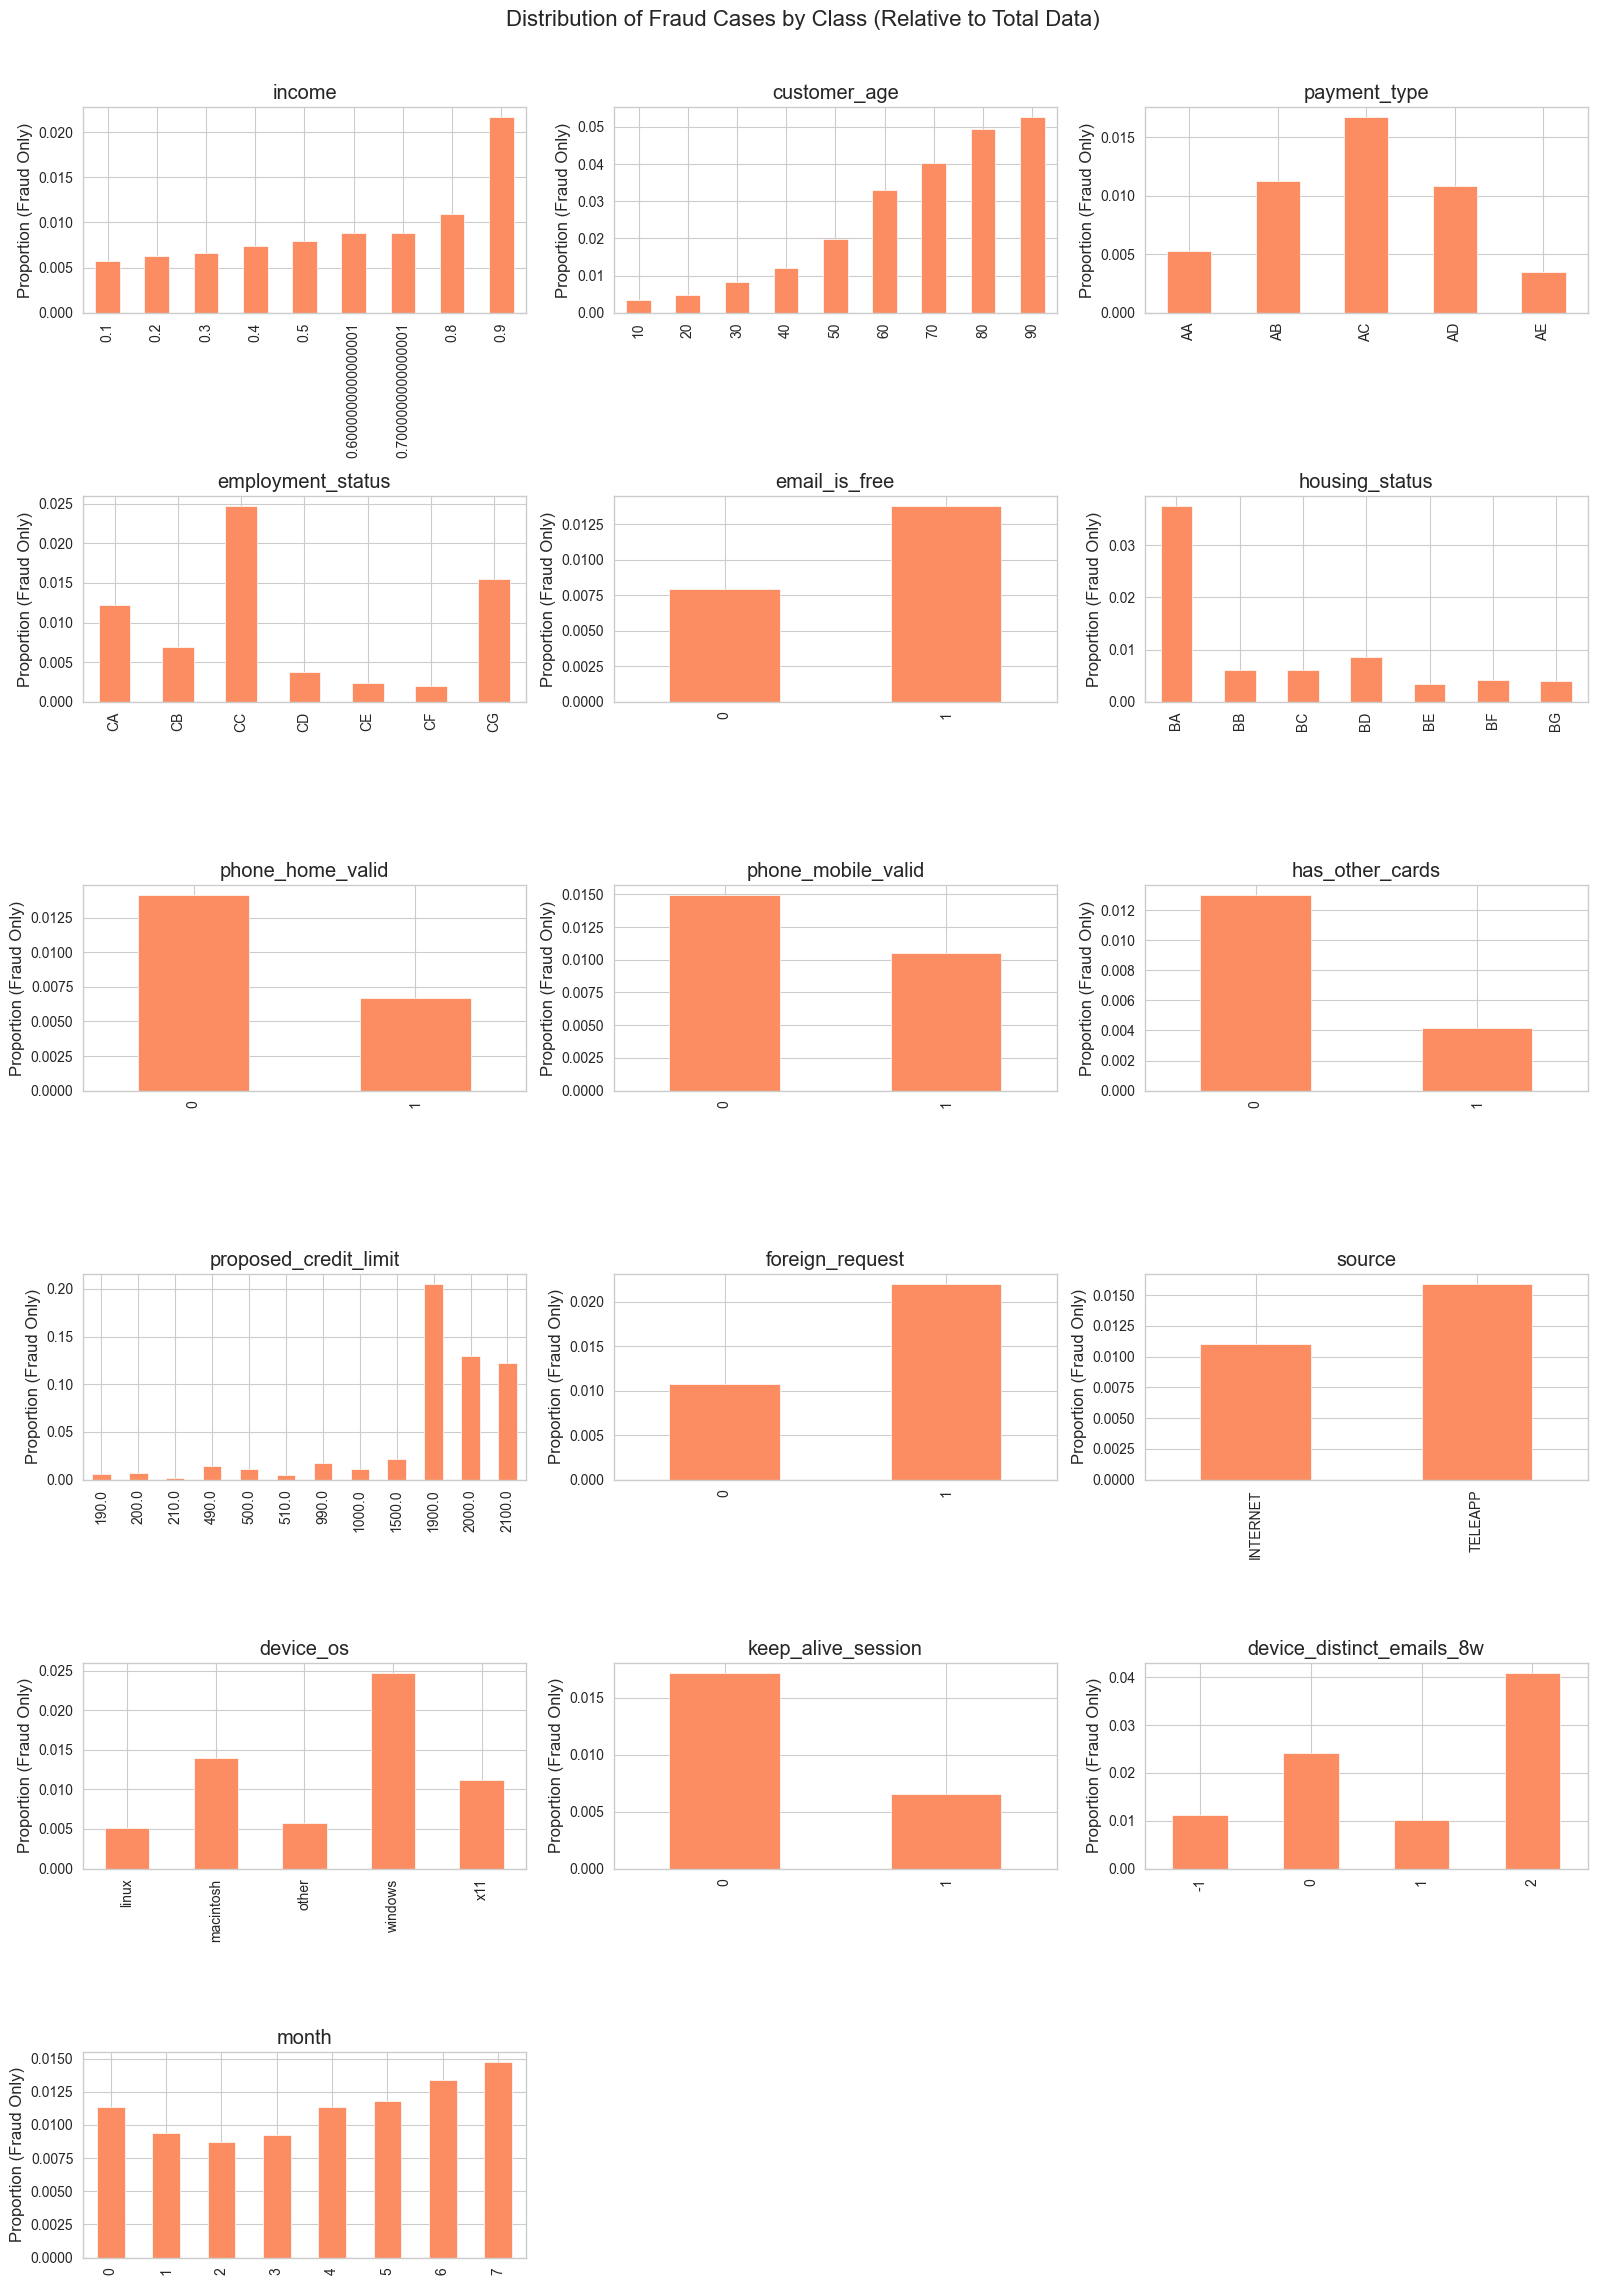

In [137]:
# fig, axes = plt.subplots(6, 3, figsize=(16, 24))
# axes = axes.flatten()
# fig.suptitle('Proportion of Fraud Cases by Class (Distribution)', fontsize=16)

# for idx, feature in enumerate(categorical_features):
#     # Calculate the proportion of fraud_bool = 1 for each category
#     plot_data = df[df['fraud_bool'] == 1][feature].value_counts(normalize=True).sort_index()
    
#     # Plot the proportion for fraud_bool = 1
#     plot_data.plot(kind='bar', color='#fc8d62', ax=axes[idx])
#     axes[idx].set_title(f'{feature}')
#     axes[idx].set_xlabel('')
#     axes[idx].set_ylabel('Proportion (Fraud Only)')
#     axes[idx].tick_params(axis='x')

# # Remove extra subplots
# for idx in range(len(categorical_features), len(axes)):
#     fig.delaxes(axes[idx])

# plt.tight_layout(rect=[0, 0.03, 1, 0.97])
# plt.show()

fig, axes = plt.subplots(6, 3, figsize=(16, 24))
axes = axes.flatten()
fig.suptitle('Distribution of Fraud Cases by Class (Relative to Total Data)', fontsize=16)

for idx, feature in enumerate(categorical_features):
    # Calculate the proportion of fraud_bool = 1 for each category relative to the total data
    plot_data = (
        df[df['fraud_bool'] == 1][feature].value_counts() / df[feature].value_counts()
    ).sort_index()
    
    # Plot the proportion for fraud_bool = 1
    plot_data.plot(kind='bar', color='#fc8d62', ax=axes[idx])
    axes[idx].set_title(f'{feature}')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Proportion (Fraud Only)')
    axes[idx].tick_params(axis='x')

# Remove extra subplots
for idx in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

In [80]:
print(categorical_features)

['income', 'customer_age', 'payment_type', 'employment_status', 'email_is_free', 'housing_status', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source', 'device_os', 'keep_alive_session', 'device_distinct_emails_8w', 'month']


### <font color=#2835ef> Finding 6: After normilising the categorical features distribution by proportion, it suggests some categorical feature that shows disproportioned distribution among each class based on fraud types. The features are: keep_alive_session, proposed_credit_limit, custome_age, income, employment_status, and housing_status. <font/>

In [61]:
# fig, axes = plt.subplots(6, 3, figsize=(16, 24))
# axes = axes.flatten()
# fig.suptitle('Stacked Bar Charts', fontsize=16)

# for idx, feature in enumerate(categorical_features):
#     cross_tab = pd.crosstab(df[feature], df['fraud_bool'], normalize='index')
#     cross_tab.plot(kind='bar', stacked=True, color=['#8da0cb', '#fc8d62'], ax=axes[idx])
#     axes[idx].set_title(feature)
#     axes[idx].set_ylabel('Proportion')
#     axes[idx].set_xlabel('')
#     axes[idx].legend(title='Fraud type', loc='lower left', bbox_to_anchor=(0, 0))
#     axes[idx].tick_params(axis='x')

# plt.tight_layout(rect=[0, 0, 1, 0.96])  # Add space for the suptitle
# plt.show()

In [61]:
# sns.catplot(data=df, x="month", y="customer_age", hue="fraud_bool", palette='Pastel2')
# sns.boxplot(x='month', y='customer_age', hue='fraud_bool', data=df, palette='Pastel2').legend(loc='upper left')

## Scaled proportion of target variable by distribution of class in the categorical variables (fraud occurrences adjusted by the prevalence of each class in each feature) 

In [48]:
feature = 'income'
target = 'fraud_bool'

fraudbyclass_distribution = pd.crosstab(df[feature], df[target], normalize=False)
fraudbyclass_distribution

fraud_bool,0,1
income,,
0.1,156540,909
0.2,68907,438
0.3,50495,338
0.4,80767,597
0.5,55414,444
0.6,110990,983
0.7,104182,927
0.8,145048,1602
0.9,216628,4791


In [24]:
a = joint_distribution.sum()
a

fraud_bool
0    988971
1     11029
dtype: int64

In [49]:
fraudbyclass_proportions = fraudbyclass_distribution.div(fraudbyclass_distribution.sum(axis=1), axis=0)
fraudbyclass_proportions

fraud_bool,0,1
income,,
0.1,0.994227,0.005773
0.2,0.993684,0.006316
0.3,0.993351,0.006649
0.4,0.992663,0.007337
0.5,0.992051,0.007949
0.6,0.991221,0.008779
0.7,0.991181,0.008819
0.8,0.989076,0.010924
0.9,0.978362,0.021638


In [33]:
b = class_proportions.transpose().sum()
b

income
0.1    1.0
0.2    1.0
0.3    1.0
0.4    1.0
0.5    1.0
0.6    1.0
0.7    1.0
0.8    1.0
0.9    1.0
dtype: float64

In [47]:
income_class_distribution = df['income'].value_counts(normalize=False).sort_index()
income_class_proportions = income_class_distribution / income_class_distribution.sum()
income_class_proportions

income
0.1    0.157449
0.2    0.069345
0.3    0.050833
0.4    0.081364
0.5    0.055858
0.6    0.111973
0.7    0.105109
0.8    0.146650
0.9    0.221419
Name: count, dtype: float64

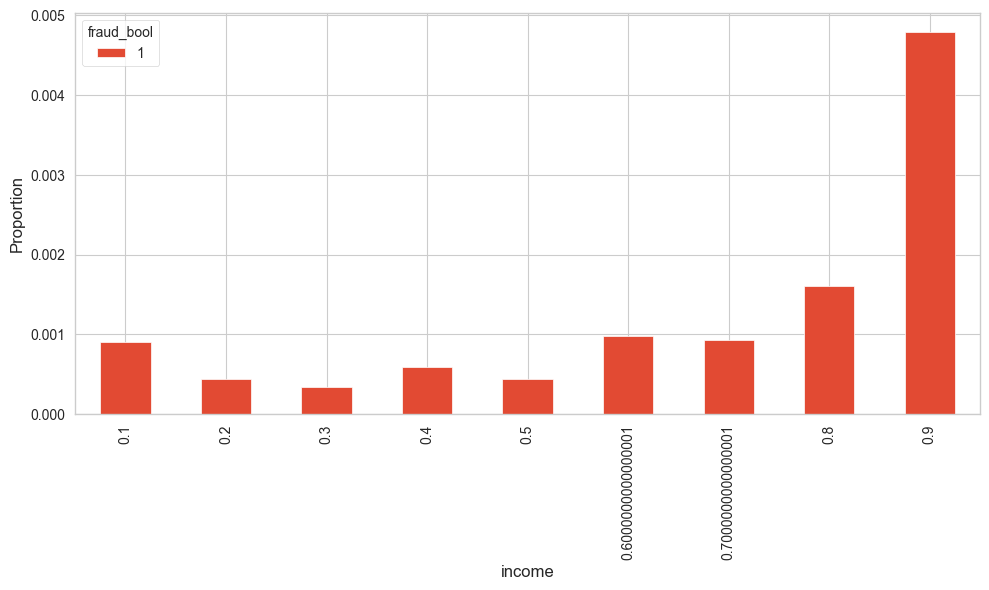

In [54]:
# prob_table_fraud = probabilistic_table[1]
# prob_table_fraud.plot(kind='bar', figsize=(10, 6), color=['#fc8d62'], edgecolor='black')
# plt.title(f'Probabilistic Table for income and fraud')
# plt.xlabel('income')
# plt.ylabel('Proportion')
# plt.legend(title='Target Value')
# plt.tight_layout()
# plt.show()

scaled_fraud_by_income = scaled_fraud_proportions[1]
scaled_fraud_by_income.plot(kind='bar', figsize=(10,6))
plt.xlabel('income')
plt.ylabel('Proportion')
plt.legend(title='fraud_bool')
plt.tight_layout()
plt.show()

## Chi-square test for independence 

In [50]:
len(categorical_features)

16

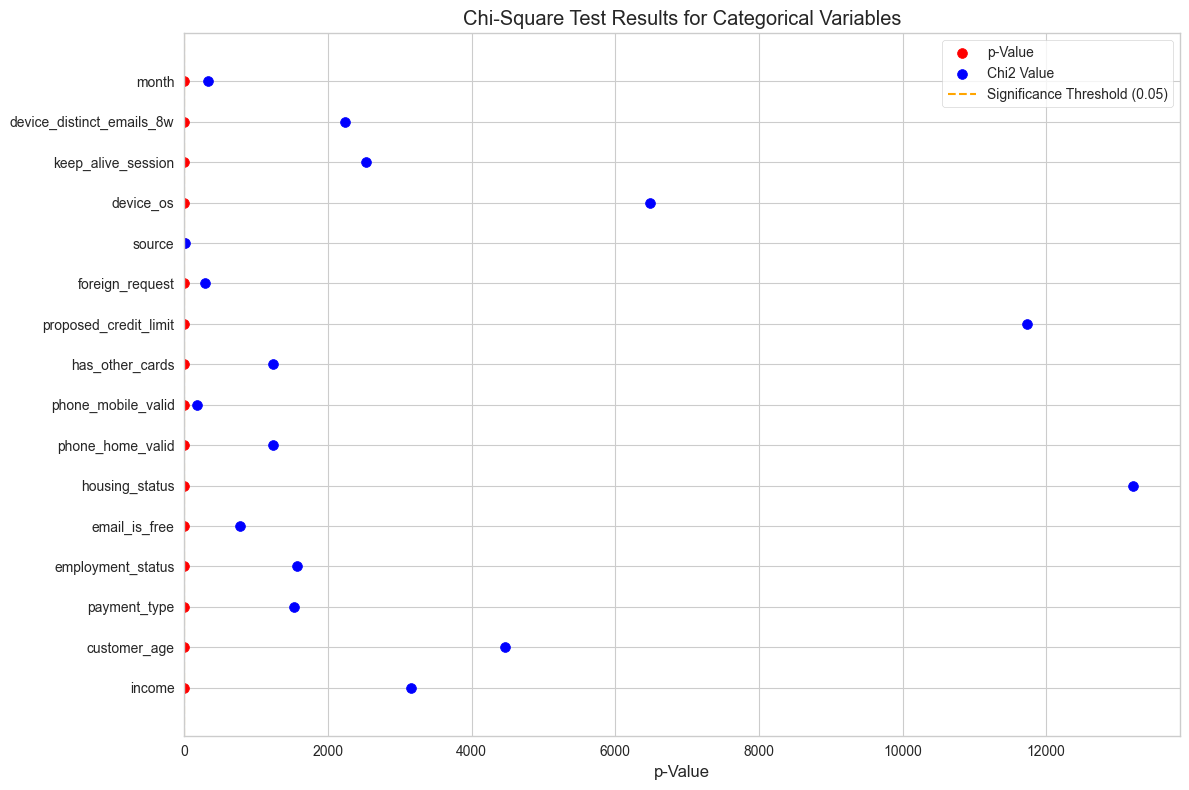

Significant Features (p < 0.05):
                      Feature        p-Value
0                      income   0.000000e+00
1                customer_age   0.000000e+00
2                payment_type   0.000000e+00
3           employment_status   0.000000e+00
4               email_is_free  1.841219e-169
5              housing_status   0.000000e+00
6            phone_home_valid  3.567963e-270
7          phone_mobile_valid   1.406547e-39
8             has_other_cards  1.392459e-270
9       proposed_credit_limit   0.000000e+00
10            foreign_request   9.787932e-64
11                     source   1.111140e-04
12                  device_os   0.000000e+00
13         keep_alive_session   0.000000e+00
14  device_distinct_emails_8w   0.000000e+00
15                      month   2.166747e-67
Not significant Features (p >0.05):
Empty DataFrame
Columns: [Feature, p-Value]
Index: []
0                        income
1                  customer_age
2                  payment_type
3             em

In [72]:
chi2_values = []
p_values = []

for feature in categorical_features:
    table = pd.crosstab(df[feature], df['fraud_bool'])
    chi2, p, dof, expected = chi2_contingency(table.values)
    chi2_values.append(chi2)
    p_values.append(p)


chi2_df = pd.DataFrame({
    'Feature': categorical_features,
    'Chi2 Value': chi2_values,
    'p-Value': p_values
})
plt.figure(figsize=(12, 8))
plt.barh(chi2_df['Feature'], chi2_df['p-Value'], color='skyblue', edgecolor='black')

# Add dots representing p-values
plt.scatter(chi2_df['p-Value'], chi2_df['Feature'], color='red', s=50, label='p-Value')
plt.scatter(chi2_df['Chi2 Value'], chi2_df['Feature'], color='blue', s=50, label='Chi2 Value')
# Add significance threshold line
plt.axvline(x=0.05, color='orange', linestyle='--', label='Significance Threshold (0.05)')

plt.xlabel('p-Value')
plt.title('Chi-Square Test Results for Categorical Variables')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print features with significant relationships
significant_features = chi2_df[chi2_df['p-Value'] < 0.05]
no_sig_features = chi2_df[chi2_df['p-Value'] >= 0.05]
print("Significant Features (p < 0.05):")
print(significant_features[['Feature', 'p-Value']])
print("Not significant Features (p >0.05):")
print(no_sig_features[['Feature', 'p-Value']])

print(chi2_df['Feature'], chi2_df['Chi2 Value'])

### There are statistically significant relationships between each categorical variable and fraud_bool.

## Understand Oridinal Categorical Features

In [64]:
# Select categorical features with more than 2 unique values and float or integer data type
ordinal_categorical_features = [
    x for x in categorical_features
    if df_base[x].dtype in ['float64', 'int64'] and df_base[x].nunique() >2
]

print("Ordinal Categorical Features are:")
print(ordinal_categorical_features)


Ordinal Categorical Features are:
['income', 'customer_age', 'proposed_credit_limit', 'device_distinct_emails_8w', 'month']


### t-test? 
Decide if the population means for two different groups are equal or not

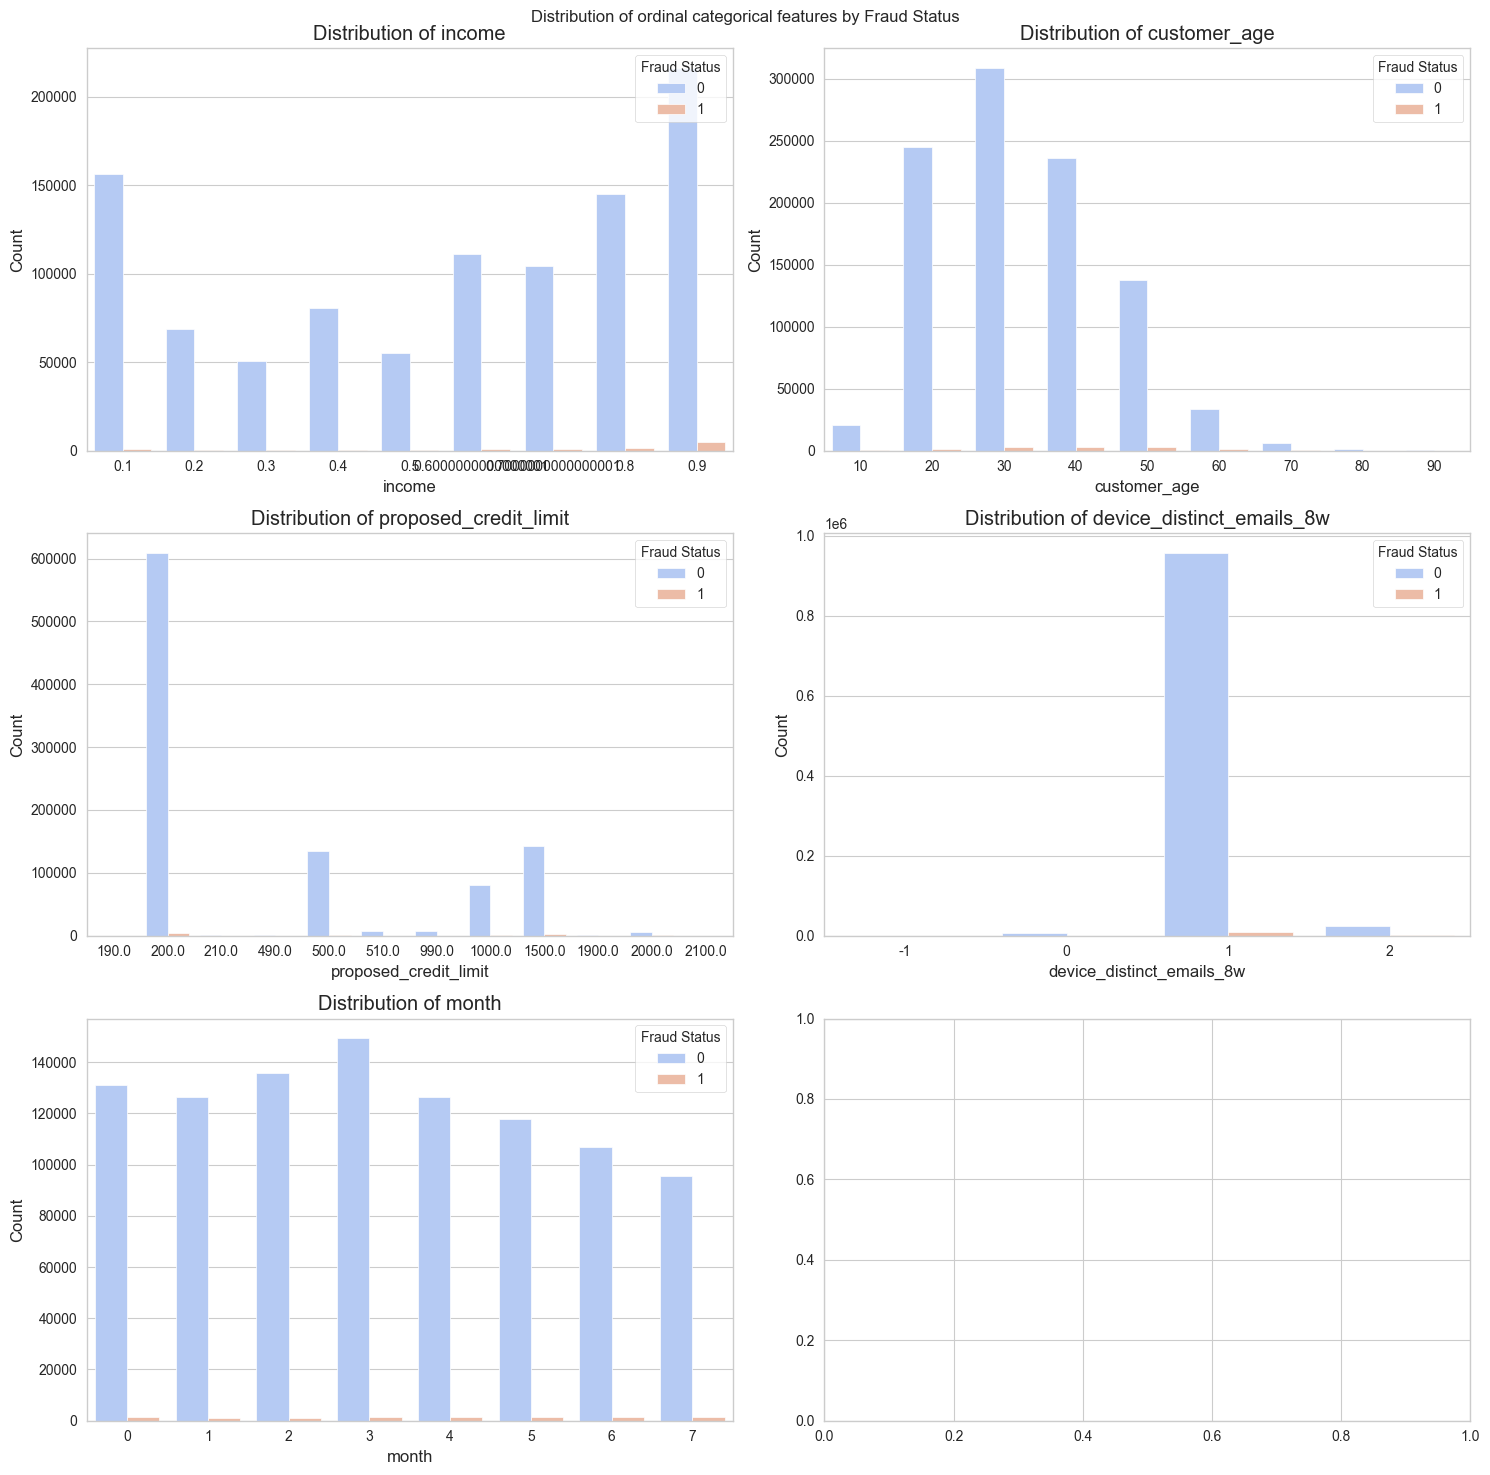

In [67]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('Distribution of ordinal categorical features by Fraud Status')

for i, feature in enumerate(ordinal_categorical_features):
    sns.countplot(data=df, x=feature, hue='fraud_bool', ax=ax, palette='coolwarm')

    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title='Fraud Status', loc='upper right')

plt.tight_layout()
plt.show()

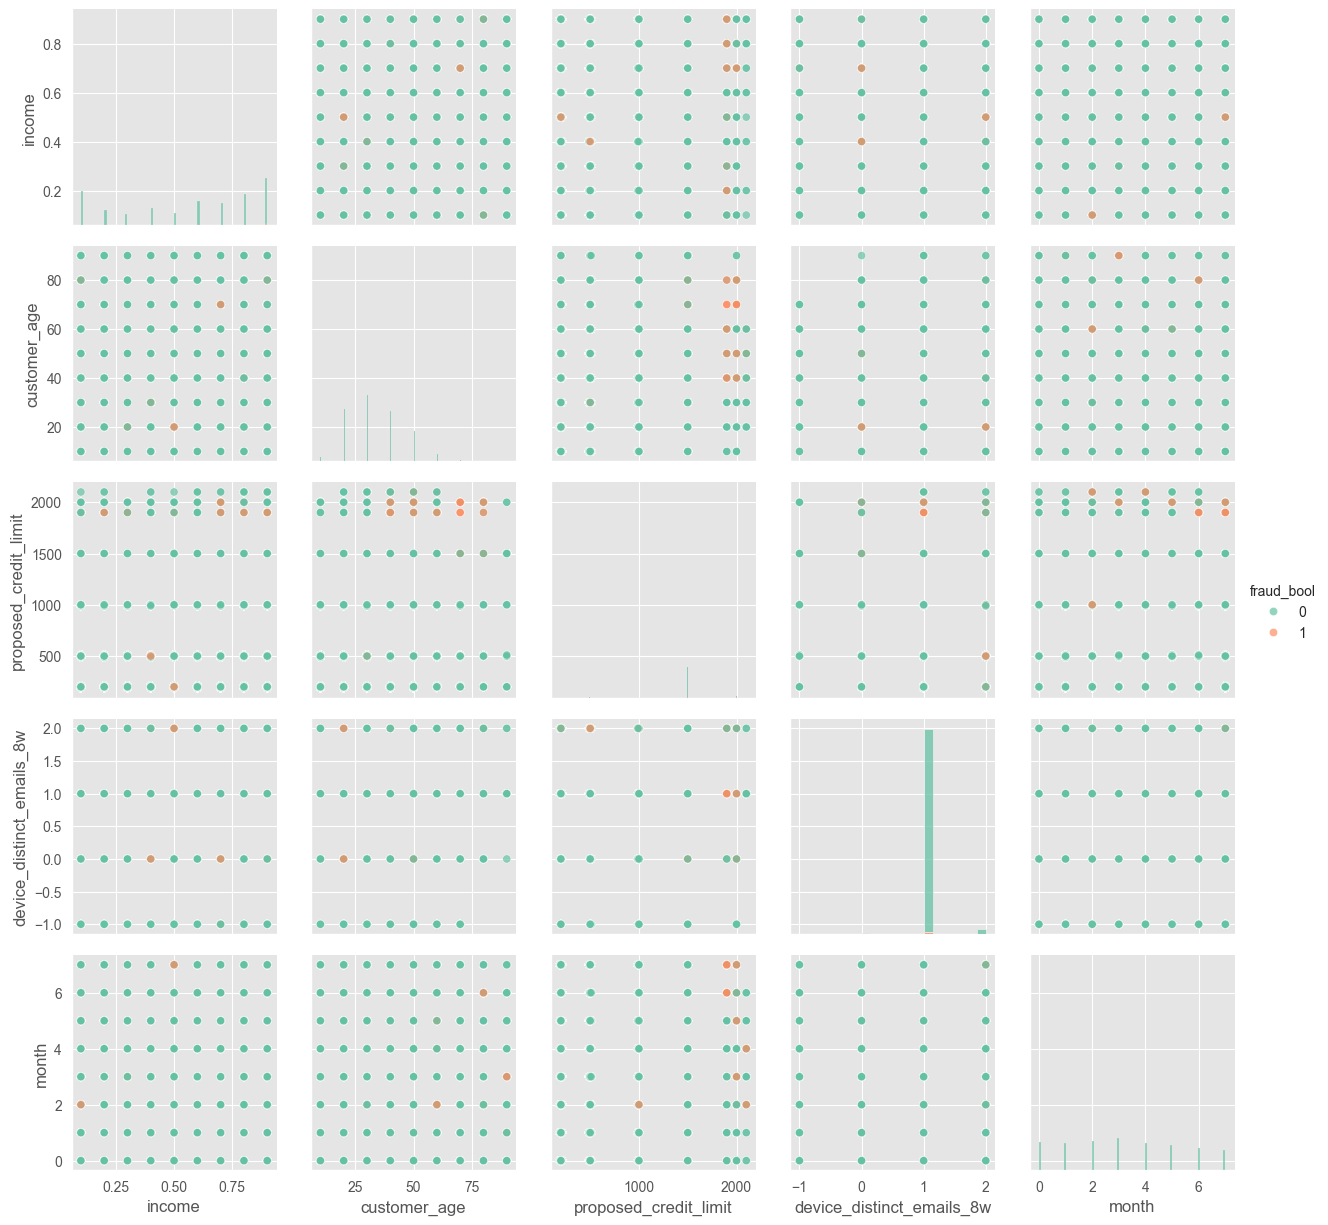

In [21]:
g = sns.PairGrid(df_base[ordinal_categorical_features + ['fraud_bool']], 
                 hue='fraud_bool',
                 palette='Set2')
g.map_offdiag(sns.scatterplot, alpha=0.7)
g.map_diag(sns.histplot, multiple='stack', element='bars', stat='count')

g.add_legend()

plt.show()

/var/folders/5x/snggv9g97tx0k82qkcyy_sp40000gn/T/ipykernel_31362/3743999507.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




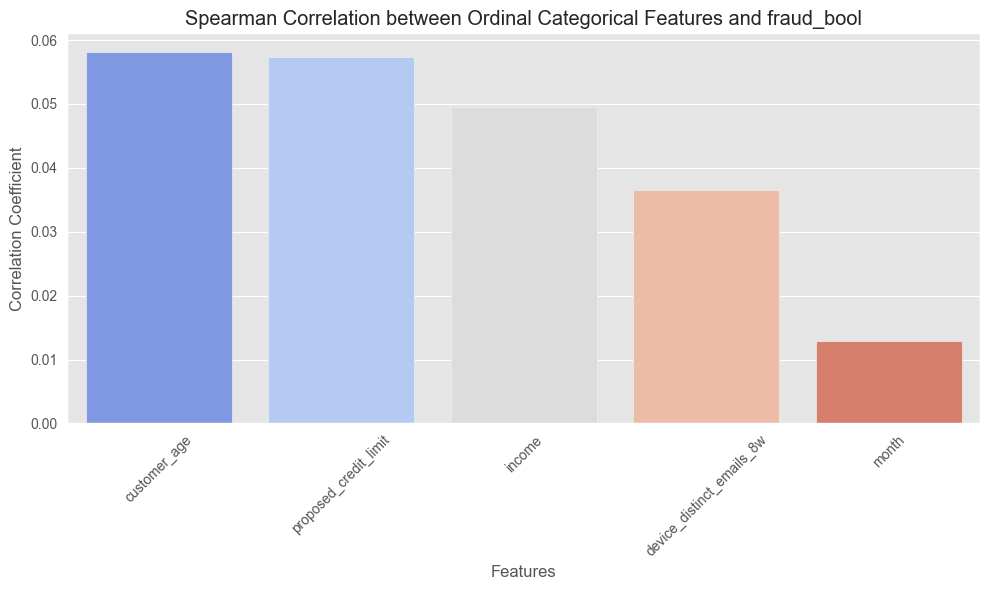

In [54]:
spearman_corr = {}

for feature in ordinal_categorical_features:
    corr, p_value = spearmanr(df[feature], df['fraud_bool'])
    spearman_corr[feature] = corr 

# Convert dictionary to DataFrame for visualization
spearman_df = pd.DataFrame.from_dict(spearman_corr, orient='index', columns=['Spearman Correlation'])

# Sort correlations for better visualization
spearman_df.sort_values(by='Spearman Correlation', ascending=False, inplace=True)

# Plot the correlations as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=spearman_df.index, y='Spearman Correlation', data=spearman_df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Spearman Correlation between Ordinal Categorical Features and Fraud type')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

## Point-biserial correlation coefficient(PBC)

                                       PBC        p-value
credit_risk_score                 0.070624   0.000000e+00
zip_count_4w                      0.005212   1.868284e-07
days_since_request                0.000567   5.705248e-01
velocity_24h                     -0.011183   4.921883e-29
velocity_4w                      -0.011536   8.687409e-31
bank_branch_count_8w             -0.011577   5.397590e-31
velocity_6h                      -0.016892   5.019689e-64
intended_balcon_amount           -0.024524  7.408217e-133
name_email_similarity            -0.036720  2.255505e-295
date_of_birth_distinct_emails_4w -0.043224   0.000000e+00
prev_address_months_count              NaN            NaN
current_address_months_count           NaN            NaN
bank_months_count                      NaN            NaN
session_length_in_minutes              NaN            NaN


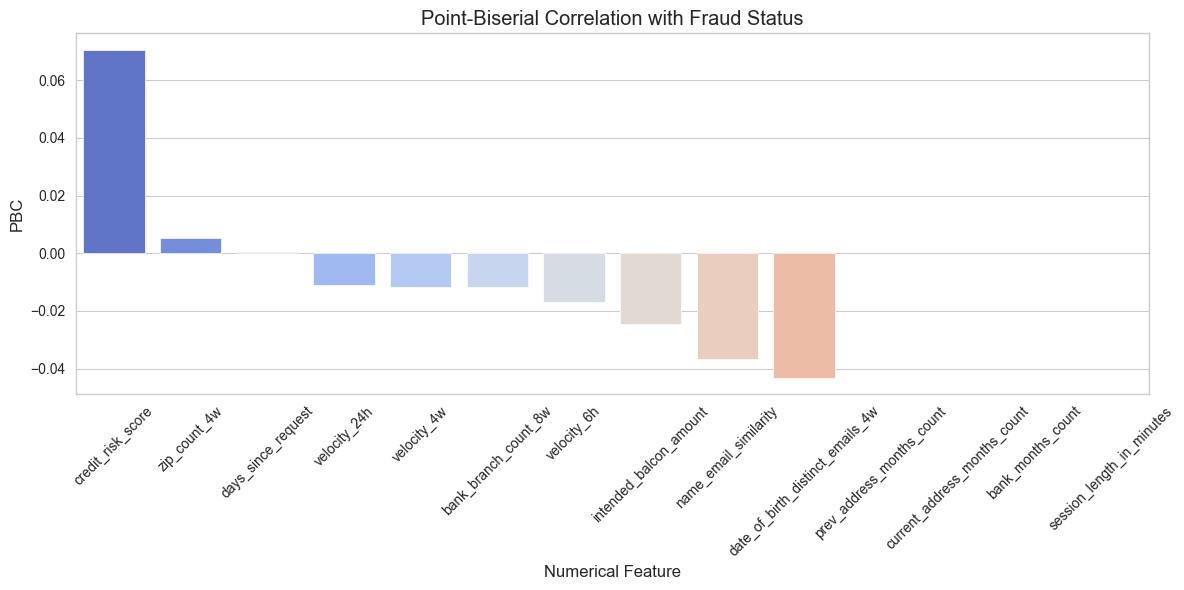

In [163]:
from scipy.stats import pointbiserialr

# Compute PBC for each numerical feature
pbc_results = {}
for feature in numerical_features:
    pbc_corr, p_value = pointbiserialr(df['fraud_bool'], df[feature])
    pbc_results[feature] = {'PBC': pbc_corr, 'p-value': p_value}

# Convert results to a DataFrame for better visualization
pbc_df = pd.DataFrame(pbc_results).T
pbc_df = pbc_df.sort_values(by='PBC', ascending=False)

# Print or visualize the results
print(pbc_df)

# Visualize PBC values with a barplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=pbc_df.index, y='PBC', data=pbc_df.reset_index(), palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Point-Biserial Correlation with Fraud Status')
plt.ylabel('PBC')
plt.xlabel('Numerical Feature')
plt.tight_layout()
plt.show()


##  Multivariate Analysis - correlation matrix plot

In [11]:
df_corr = df_base[numerical_features].corr()
df_corr

,name_email_similarity,prev_address_months_count,current_address_months_count,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,session_length_in_minutes
name_email_similarity,1.000000,-0.018186,0.050305,-0.007736,0.029040,0.025114,0.024881,0.035221,0.039968,-0.001470,0.022994,0.049126,-0.006351,0.005998
prev_address_months_count,-0.018186,1.000000,-0.271730,0.078107,-0.009428,-0.029638,-0.001265,0.009020,0.005413,-0.040628,0.059560,-0.016104,-0.045550,0.051425
current_address_months_count,0.050305,-0.271730,1.000000,-0.057836,0.057601,0.047286,0.027508,0.018753,0.026172,0.054202,-0.174714,0.094976,0.071997,-0.033574
days_since_request,-0.007736,0.078107,-0.057836,1.000000,0.019782,0.000249,0.027968,0.023869,0.017706,-0.018173,0.018731,-0.088141,-0.027460,0.049613
intended_balcon_amount,0.029040,-0.009428,0.057601,0.019782,1.000000,0.002251,0.042849,0.064080,0.051407,0.102919,-0.027343,0.002058,0.178374,0.022811
zip_count_4w,0.025114,-0.029638,0.047286,0.000249,0.002251,1.000000,0.142372,0.201186,0.302955,0.005958,0.126885,-0.102645,0.053637,0.039687
velocity_6h,0.024881,-0.001265,0.027508,0.027968,0.042849,0.142372,1.000000,0.464003,0.400254,0.020140,0.118752,-0.145254,0.014874,0.054491
velocity_24h,0.035221,0.009020,0.018753,0.023869,0.064080,0.201186,0.464003,1.000000,0.539115,0.036062,0.155434,-0.146770,0.018855,0.066875
velocity_4w,0.039968,0.005413,0.026172,0.017706,0.051407,0.302955,0.400254,0.539115,1.000000,0.031267,0.242365,-0.168766,0.032344,0.079005
bank_branch_count_8w,-0.001470,-0.040628,0.054202,-0.018173,0.102919,0.005958,0.020140,0.036062,0.031267,1.000000,-0.036952,-0.014569,0.142625,0.004887


<Axes: >

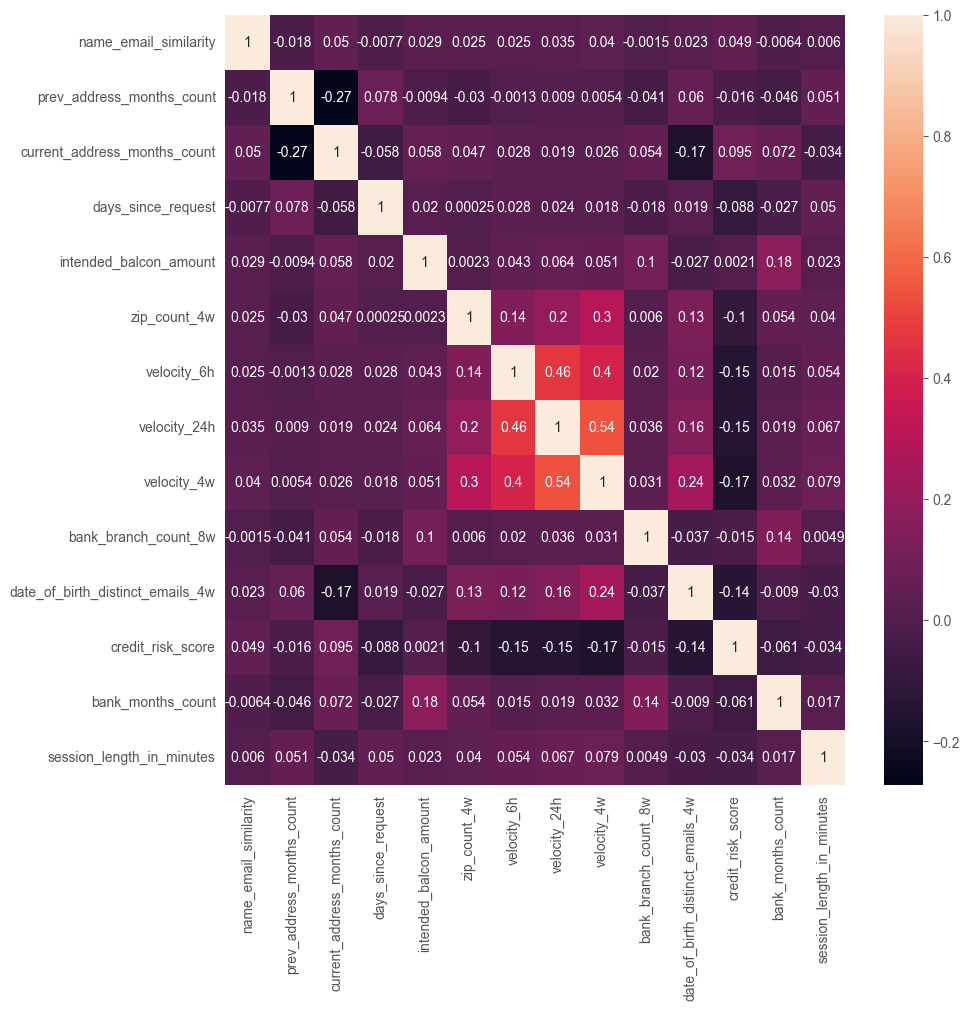

In [17]:
plt.figure(figsize=(10, 10))
# sns.heatmap(df_corr, annot=True, cmap='Pastel2')
sns.heatmap(df_corr, xticklabels=df_corr.columns.values,  annot=True, yticklabels = df_corr.columns.values)

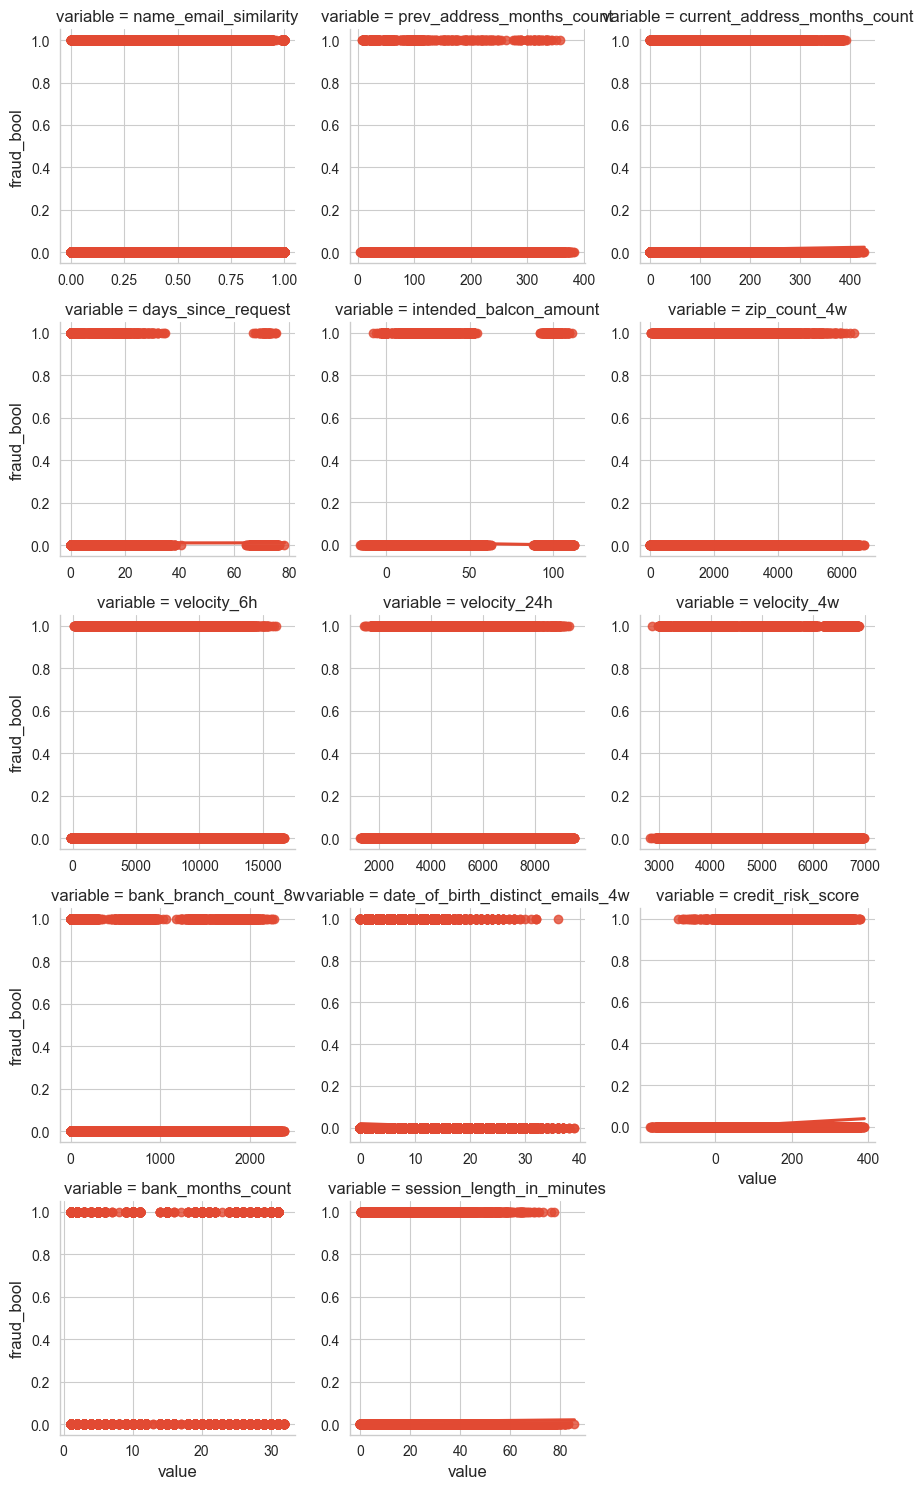

In [165]:
f = pd.melt(df, id_vars=['fraud_bool'], value_vars=numerical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.regplot, "value", 'fraud_bool')

### <font color=blue> There is no significant correlation between the numerical variables based on the multivariate analysis. <font/>

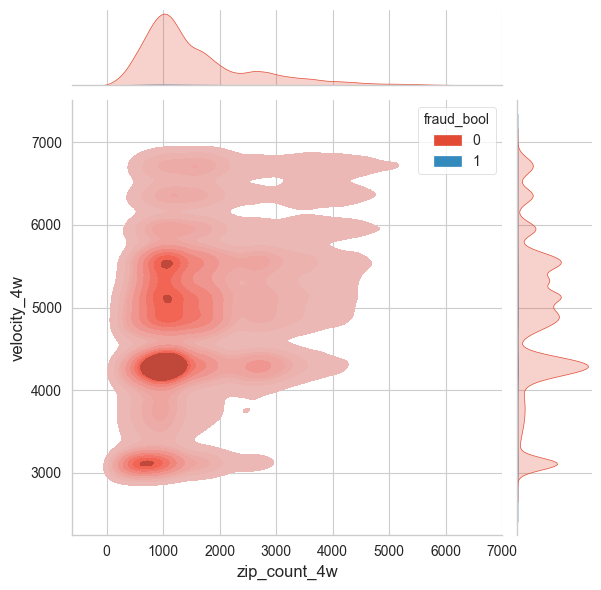

In [21]:
sns.jointplot(
    data=df, 
    x="zip_count_4w", 
    y="velocity_4w", 
    hue="fraud_bool", 
    kind="kde",  
    fill=True 
)

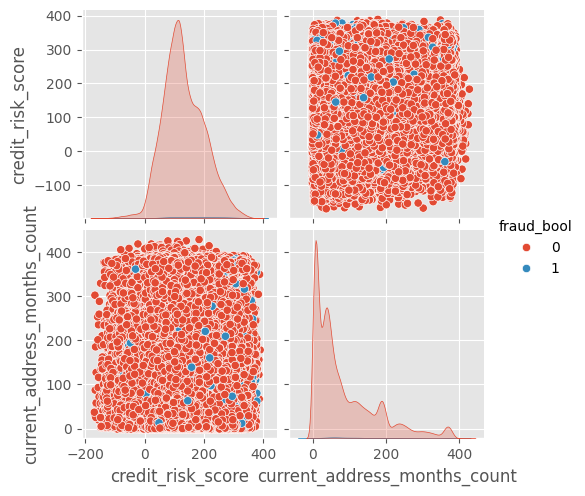

In [15]:
sns.pairplot(df_base, vars=[
                            'credit_risk_score', 
                            'current_address_months_count'],
            hue='fraud_bool')
plt.show()

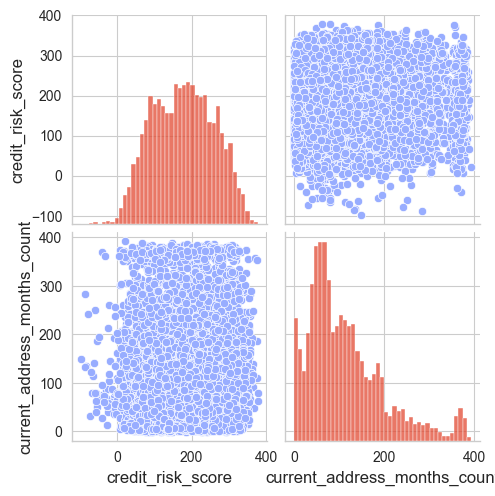

In [21]:
sns.pairplot(df_fraud_only, vars=[
                            'credit_risk_score', 
                            'current_address_months_count'],
            plot_kws={'color': '#98adff'},
            palette='Blues')
plt.show()

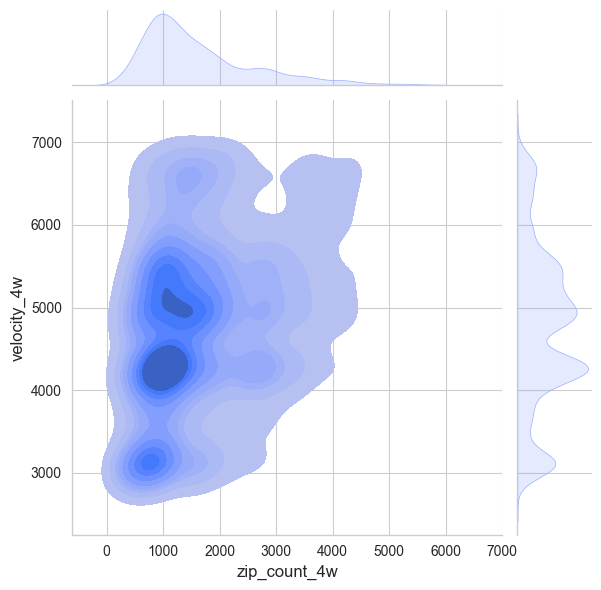

In [14]:
sns.jointplot(
    data=df_fraud_only, 
    x="zip_count_4w", 
    y="velocity_4w", 
    kind="kde",  
    fill=True,   
    color="#98adff" 
)

plt.show()

In [36]:
print(len(numerical_features))

14


In [41]:
print(numerical_features)

['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'session_length_in_minutes']


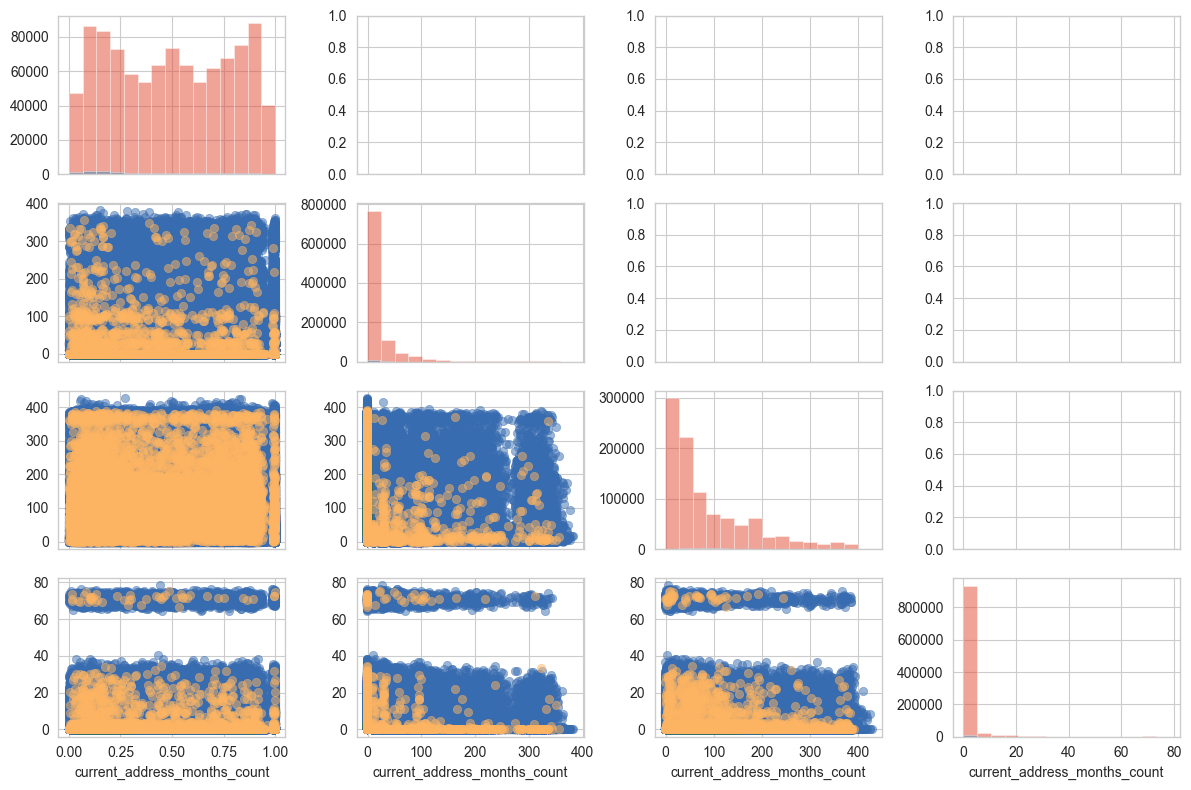

In [48]:
colors = ["#386cb0", "#fdb462"]
fraud_type = ['0', '1']
columns = ['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request']

fig, axes = plt.subplots(4, 4, figsize=(12, 8), sharex="col", tight_layout=True)

for i in range(len(columns)):
    for j in range(len(columns)):
        # If this is the lower-triangule, add a scatterlpot for each group.
        if i > j:
            for fraud, color in zip(fraud_type, colors):
                data = df[df['fraud_bool'] == int(fraud)]
                axes[i, j].scatter(column[j], column[i], color=color, alpha=0.5, data=data)
                
                
        # If this is the main diagonal, add histograms
        if i == j:
            for fraud, color in zip(fraud_type, colors):
                data = df[df["fraud_bool"] == int(fraud)]
                axes[i, j].hist(column[j], bins=15, alpha=0.5, data=data)


# for ax in axes[-1, :]:
#     ax.set_xlabel('Numerical Features', fontsize=10)
# for ax in axes[:, 0]:
#     ax.set_ylabel('Numerical Features', fontsize=10)

plt.show()

## Handle missing values

In [130]:
df = df_base.copy()

In [62]:
# get names of columns with missing values
missing_value_val = [x for x in df_base.columns if (df_base[x].min() == -1)]

print("Features with missing values represented by -1:")
print(missing_value_val)

Features with missing values represented by -1:
['prev_address_months_count', 'current_address_months_count', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']


In [131]:
missing_vals = pd.DataFrame()

missing_features = ['prev_address_months_count', 'current_address_months_count', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']

for feature in missing_features:
    df.loc[df[feature] < 0, feature] = np.nan # df[feature] = df[feature].replace(-1, np.nan)
    missing_vals_col = df.groupby('fraud_bool')[feature].apply(lambda x: round(x.isna().sum()/len(x) * 100, 2))
    missing_vals[feature] = missing_vals_col
    
missing_vals = pd.DataFrame(missing_vals.T.stack())

missing_vals.reset_index(inplace=True)
missing_vals.rename(columns={'level_0': 'feature', 0: 'missing_vals_percentage'}, inplace=True)

print(missing_vals)

                        feature  fraud_bool  missing_vals_percentage
0     prev_address_months_count           0                    71.06
1     prev_address_months_count           1                    91.89
2  current_address_months_count           0                     0.43
3  current_address_months_count           1                     0.13
4             bank_months_count           0                    25.23
5             bank_months_count           1                    37.54
6     session_length_in_minutes           0                     0.20
7     session_length_in_minutes           1                     0.16
8     device_distinct_emails_8w           0                     0.04
9     device_distinct_emails_8w           1                     0.04


In [132]:
# For features with missing_vals_percentage < 1, impute missing values with mode of the group 
df_imputed = df.copy()

grouping_column = 'fraud_bool'
columns_to_impute = ['current_address_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']

df_imputed[columns_to_impute] = df_imputed[columns_to_impute].replace(-1, np.nan)

for column in columns_to_impute:
    df_imputed[column] = df_imputed.groupby(grouping_column)[column].transform(
        lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median())
    )

# Verify no more -1 values
print((df_imputed[columns_to_impute] == -1).sum())

current_address_months_count    0
session_length_in_minutes       0
device_distinct_emails_8w       0
dtype: int64


In [133]:
columns_to_impute_2 = ['bank_months_count', 'prev_address_months_count']
grouping_column = 'fraud_bool'

df_imputed[columns_to_impute_2] = df_imputed[columns_to_impute_2].replace(-1, np.nan)

for col in columns_to_impute_2:
    df_imputed[col + '_was_missing'] = (df_imputed[col].isna()).astype(int)
    df_imputed[col] = df_imputed.groupby(grouping_column)[col].transform(
        lambda x: x.fillna(x.mean())
    )

# Verify results
print("Count of -1 values after imputation:")
print((df_imputed[columns_to_impute_2] == -1).sum())

print("Counts in '_was_missing' columns:")
print(df_imputed[['bank_months_count_was_missing', 'prev_address_months_count_was_missing']].value_counts())


Count of -1 values after imputation:
bank_months_count            0
prev_address_months_count    0
dtype: int64
Counts in '_was_missing' columns:
bank_months_count_was_missing  prev_address_months_count_was_missing
0                              1                                        548152
                               0                                        198213
1                              1                                        164768
                               0                                         88867
Name: count, dtype: int64


## Handle categorical values

In [134]:
# Create a list of categorical features
categorical_features = [x for x in df_base.columns if df_base[x].nunique() <= 12 and df_base[x].nunique()>= 2]
categorical_features.remove('fraud_bool')
print("Categorical Features:")
print(categorical_features)

Categorical Features:
['income', 'customer_age', 'payment_type', 'employment_status', 'email_is_free', 'housing_status', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source', 'device_os', 'keep_alive_session', 'device_distinct_emails_8w', 'month']


In [135]:
df_imputed[categorical_features].head()

,income,customer_age,payment_type,employment_status,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,has_other_cards,proposed_credit_limit,foreign_request,source,device_os,keep_alive_session,device_distinct_emails_8w,month
0,0.3,40,AA,CB,1,BC,0,1,0,1500.0,0,INTERNET,linux,1,1.0,0
1,0.8,20,AD,CA,1,BC,1,1,0,1500.0,0,INTERNET,other,1,1.0,0
2,0.8,40,AB,CA,1,BC,0,1,0,200.0,0,INTERNET,windows,0,1.0,0
3,0.6,30,AB,CA,1,BC,0,1,0,200.0,0,INTERNET,linux,1,1.0,0
4,0.9,40,AA,CA,0,BC,1,1,0,200.0,0,INTERNET,other,0,1.0,0


In [136]:
# One-hot encoding for categorical featuers with dtype as 'object'
df_new = df_imputed.copy()
object_features = [col for col in df_new.columns if df_new[col].dtypes == 'object']
print(object_features)

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


In [137]:
df_new = pd.DataFrame(pd.get_dummies(df_new, prefix=object_features, dtype=np.int64))
df_new.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,bank_months_count_was_missing,prev_address_months_count_was_missing,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE,employment_status_CA,employment_status_CB,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,housing_status_BA,housing_status_BB,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,0.3,0.986506,60.648563,25.0,40,0.006735,102.453711,1059,13096.035018,7850.955007,6742.080561,5,5,163,1,0,1,9.0,0,1500.0,0,16.224843,1,1.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
1,0,0.8,0.617426,60.648563,89.0,20,0.010095,-0.849551,1658,9223.283431,5745.251481,5941.664859,3,18,154,1,1,1,2.0,0,1500.0,0,3.363854,1,1.0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,0,0.8,0.996707,9.000000,14.0,40,0.012316,-1.490386,1095,4471.472149,5471.988958,5992.555113,15,11,89,1,0,1,30.0,0,200.0,0,22.730559,0,1.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0,0.6,0.475100,11.000000,14.0,30,0.006991,-1.863101,3483,14431.993621,6755.344479,5970.336831,11,13,90,1,0,1,1.0,0,200.0,0,15.215816,1,1.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
4,0,0.9,0.842307,60.648563,29.0,40,5.742626,47.152498,2339,7601.511579,5124.046930,5940.734212,1,6,91,0,1,1,26.0,0,200.0,0,3.743048,0,1.0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [138]:
df_new.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w',
       'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
       'credit_risk_score', 'email_is_free', 'phone_home_valid',
       'phone_mobile_valid', 'bank_months_count', 'has_other_cards',
       'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes',
       'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count',
       'month', 'bank_months_count_was_missing',
       'prev_address_months_count_was_missing', 'payment_type_AA',
       'payment_type_AB', 'payment_type_AC', 'payment_type_AD',
       'payment_type_AE', 'employment_status_CA', 'employment_status_CB',
       'employment_status_CC', 'employment_status_CD', 'employment_status_CE',
       'employment_status_CF', 'employment

In [139]:
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,60.901165,34.142077,5.000000e+00,60.648563,60.648563,60.648563,383.000000
current_address_months_count,1000000.0,86.618219,88.377876,0.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


In [153]:
categorical_features = [feature for feature in df_new.columns if df_new[feature].nunique() >= 2 and df_new[feature].nunique() <= 12]
categorical_features.remove('fraud_bool')
print(categorical_features)

['income', 'customer_age', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w', 'month', 'bank_months_count_was_missing', 'prev_address_months_count_was_missing', 'payment_type_AA', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 'employment_status_CA', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'employment_status_CG', 'housing_status_BA', 'housing_status_BB', 'housing_status_BC', 'housing_status_BD', 'housing_status_BE', 'housing_status_BF', 'housing_status_BG', 'source_INTERNET', 'source_TELEAPP', 'device_os_linux', 'device_os_macintosh', 'device_os_other', 'device_os_windows', 'device_os_x11']


In [154]:
df_cat = df_new[categorical_features].copy()

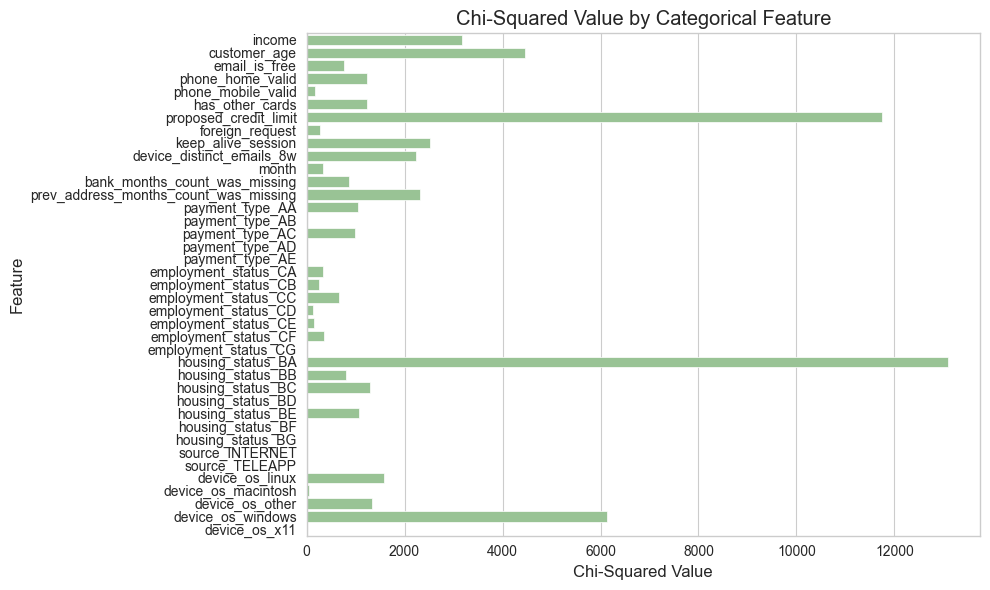

In [162]:
# from sklearn.feature_selection import chi2
import scipy.stats as stats
chi_squared_values = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(df_new[feature], df_new['fraud_bool'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    
    # Store the Chi-Squared value
    chi_squared_values[feature] = chi2

# Convert the dictionary to a DataFrame for easy plotting
chi_squared_df = pd.DataFrame(list(chi_squared_values.items()), columns=['Feature', 'Chi-Squared Value'])

# Plot the Chi-Squared values
plt.figure(figsize=(10, 6))
sns.barplot(x='Chi-Squared Value', y='Feature', data=chi_squared_df, color='#93cb8d')
plt.title('Chi-Squared Value by Categorical Feature')
plt.xlabel('Chi-Squared Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()